In [1]:
# you need inst_h_d and instagram.csv to fully use this notebook

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from scipy.stats import kruskal
import scikit_posthocs as sp
import pprint
from load_inst import *
from pandas.plotting import register_matplotlib_converters
%matplotlib inline
register_matplotlib_converters()
plt.rcParams.update({'figure.max_open_warning': 0})

# Basic analysis

In [2]:
instagram = load_instagram() # use this line if you want load whole data

In [5]:
instagram.head(5)

,Time,ID,Likes,Comments,Followers,Char_in_desrc,Tags,First_app
0,2019-02-13 22:50:00,Bt00auZFoSZ,49,6,127,1178,30,2019-02-13 14:30:00
1,2019-02-13 22:50:00,BtyS9joIX88,77,13,127,1167,30,2019-02-12 14:55:00
2,2019-02-13 22:50:00,BtvomOoIkQ-,97,1,127,1318,29,2019-02-11 14:10:00
3,2019-02-13 22:50:00,Bth_T3sFTou,180,4,127,1130,29,2019-02-06 06:55:00
4,2019-02-13 22:50:00,BtfXywtF88J,114,3,127,498,28,2019-02-05 06:35:00


In [4]:
len(instagram.ID.unique())

60

In [ ]:
plt.figure(figsize=(30,20))
sns.lineplot(data=instagram, x='Time', y='Likes', hue='ID')

In [ ]:
get_rows = rows_choose(days=range(1,31))
inst_h_d = get_rows.transform(instagram) # do not use unless you have updated the data or you want to
                                         # get different timeshifts, it takes a lot of time to compute
with open('inst_h_d', 'wb') as save_pickle:
    pickle.dump(inst_h_d, save_pickle)

In [52]:
with open('inst_h_d', 'rb') as tmp_pickle: # line to load data frame with default time shifts
    inst_h_d = pickle.load(tmp_pickle)

In [4]:
inst_h_d.loc['1h'].head(5)

,Time,Likes,Comments,Followers,Char_in_desrc,Tags,First_app
ID,,,,,,,
BuanJymFL12,2019-02-28 07:45:00,24,1,122,1688,24,2019-02-28 06:45:00
Bud-HgZFl32,2019-03-01 15:00:00,17,0,123,1641,23,2019-03-01 14:00:00
BufzjCaF7rs,2019-03-02 08:05:00,20,0,126,506,18,2019-03-02 07:05:00
Bu20QZxFG3G,2019-03-11 06:35:00,25,1,126,478,25,2019-03-11 05:35:00
Bu5aBa9lnQv,2019-03-12 06:45:00,20,2,127,423,25,2019-03-12 05:45:00


In [53]:
dividing_point = (4, 7, 10, 16)
# default pipeline, it adds two columns - hours of first appereance as integers (it first rounds
# that time to full hours) and intervals of the time of first appereance
inst_h_d_pipe = Pipeline([('hours_to_int', get_hours()),
                          ('hours_intervals', hours_interval(dividing_points=dividing_point))])
inst_h_d_to_use = inst_h_d_pipe.fit_transform(inst_h_d)
inst_h_d_to_use.loc['1h']

,Time,Likes,Comments,Followers,Char_in_desrc,Tags,First_app,Int_hour,Time_intervals
ID,,,,,,,,,
BuanJymFL12,2019-02-28 07:45:00,24,1,122,1688,24,2019-02-28 06:45:00,7,4-7
Bud-HgZFl32,2019-03-01 15:00:00,17,0,123,1641,23,2019-03-01 14:00:00,14,10-16
BufzjCaF7rs,2019-03-02 08:05:00,20,0,126,506,18,2019-03-02 07:05:00,7,7-10
Bu20QZxFG3G,2019-03-11 06:35:00,25,1,126,478,25,2019-03-11 05:35:00,6,4-7
Bu5aBa9lnQv,2019-03-12 06:45:00,20,2,127,423,25,2019-03-12 05:45:00,6,4-7
Bu8C1x5lHGY,2019-03-13 07:20:00,35,0,131,412,25,2019-03-13 06:20:00,6,4-7
Bu-nZp9Fb9M,2019-03-14 07:20:00,11,1,136,477,25,2019-03-14 06:20:00,6,4-7
BvBKWNll3MN,2019-03-15 07:00:00,19,0,135,317,25,2019-03-15 06:00:00,6,4-7
BvEV3yzl0mA,2019-03-16 12:40:00,21,0,136,317,25,2019-03-16 11:40:00,12,10-16


## Plots

In [54]:
my_order = create_time_intervals(dividing_point)
time_shift_h_list = ['%sh' %num for num in range(1,24,1)]
hours_names = ['1 hour']
hours_names.extend(['%s hours' %num for num in range(2,24,1)])
time_shift_d_list = ['%sd' %num for num in range(1,31,1)]
days_names = ['1 day']
days_names.extend(['%s days' %num for num in range(2,31,1)])

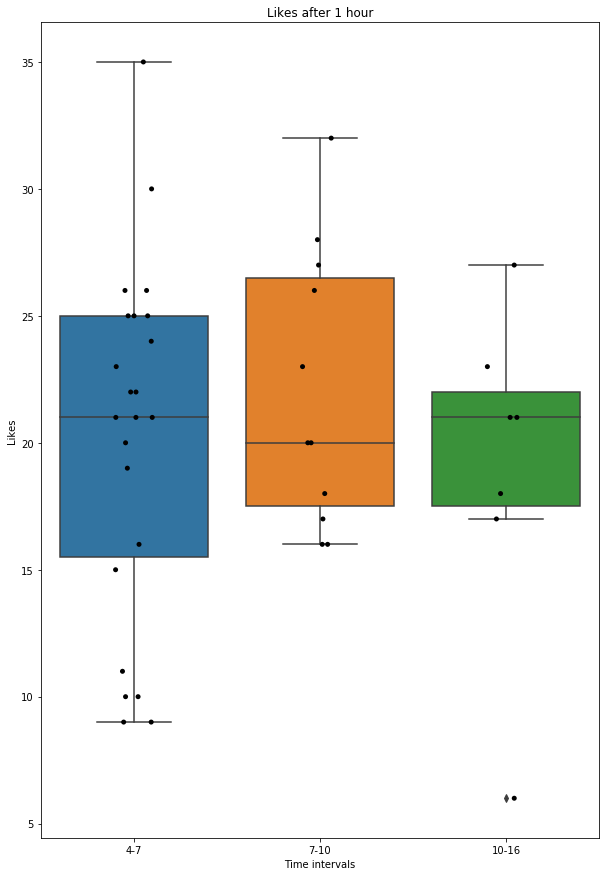

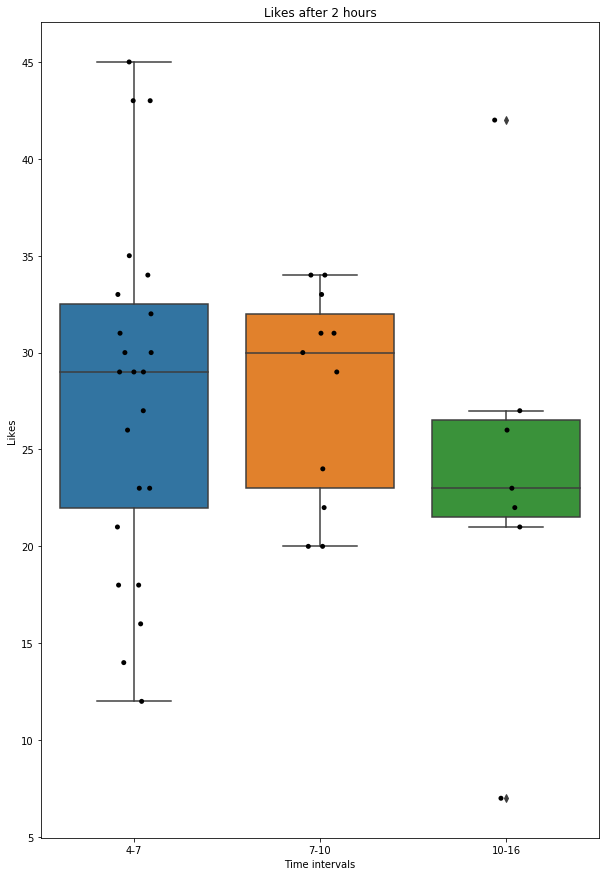

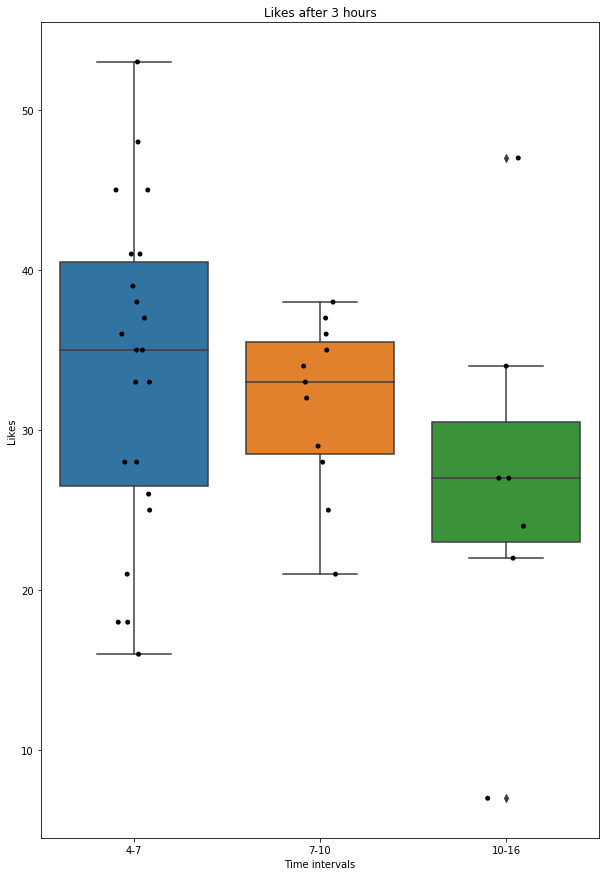

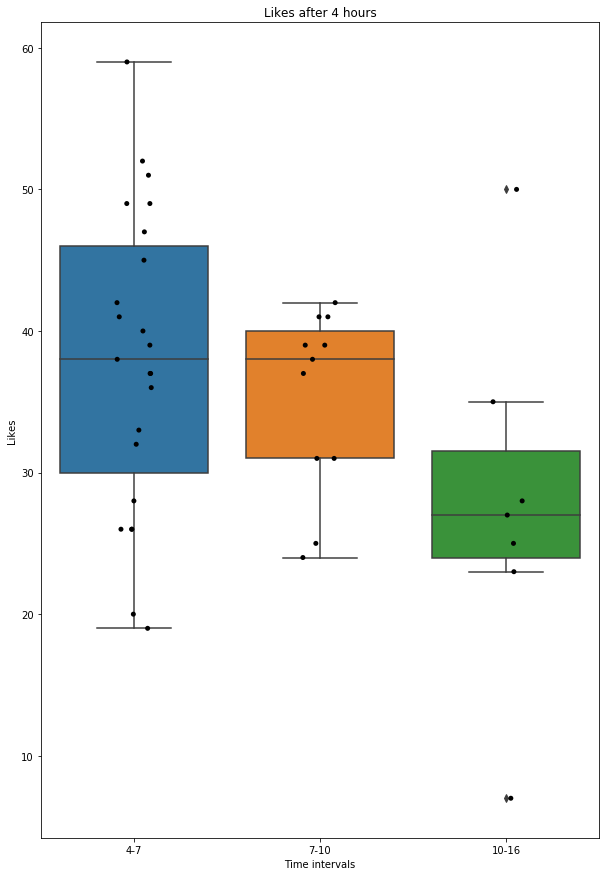

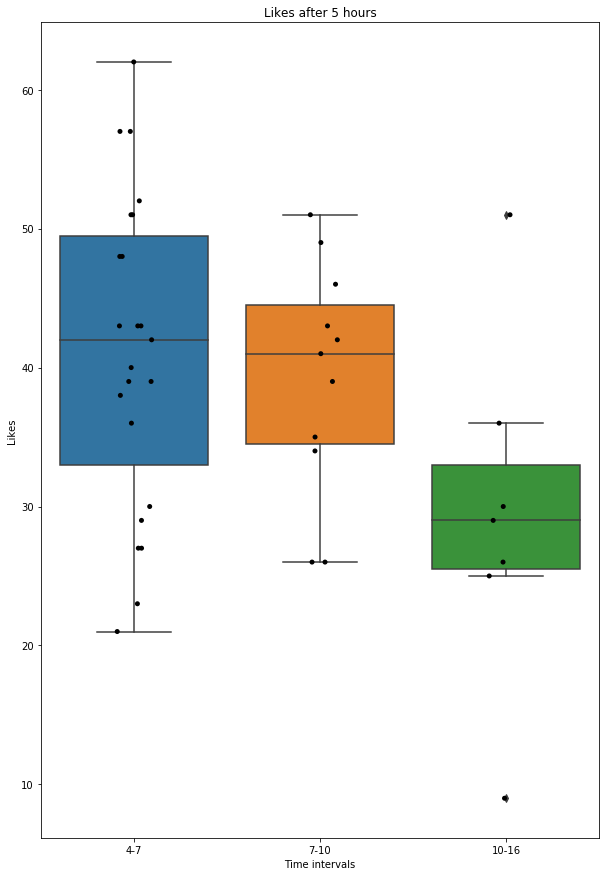

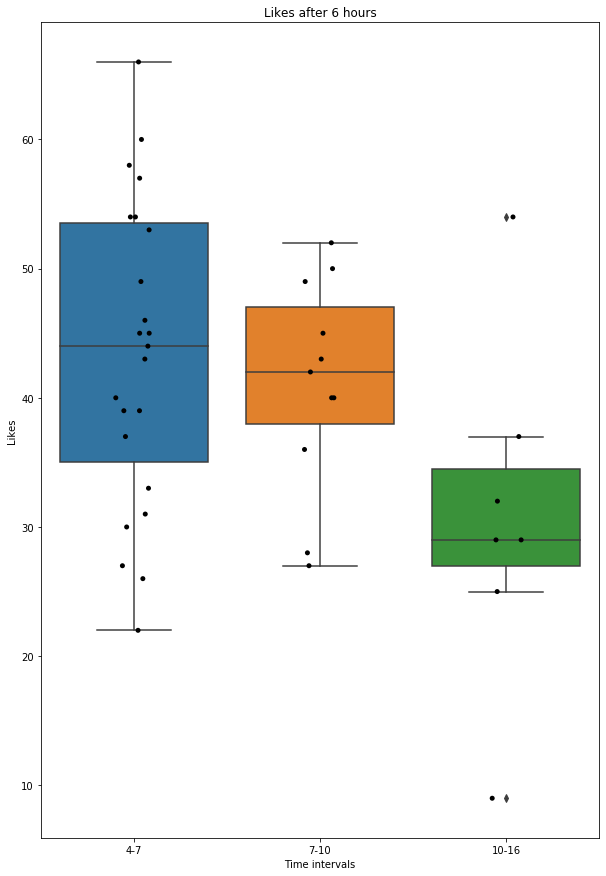

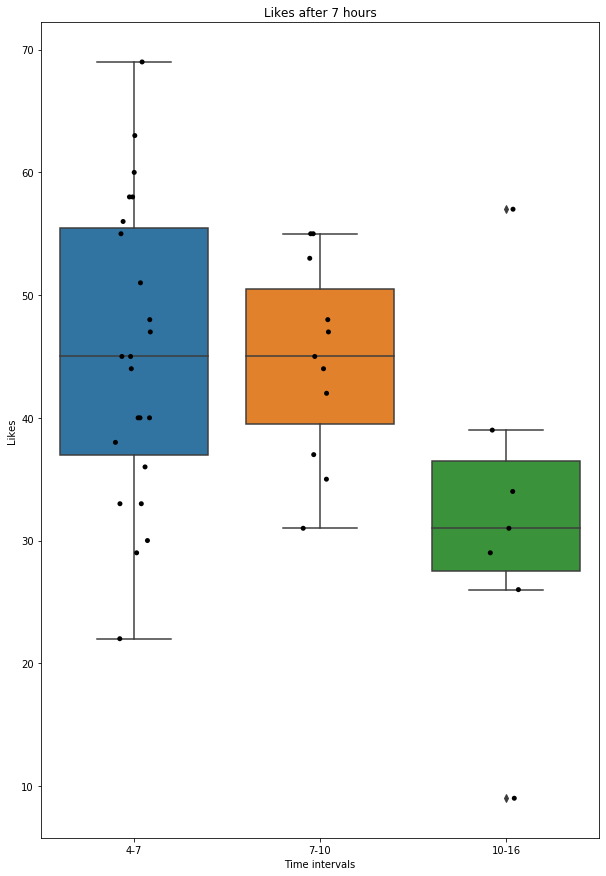

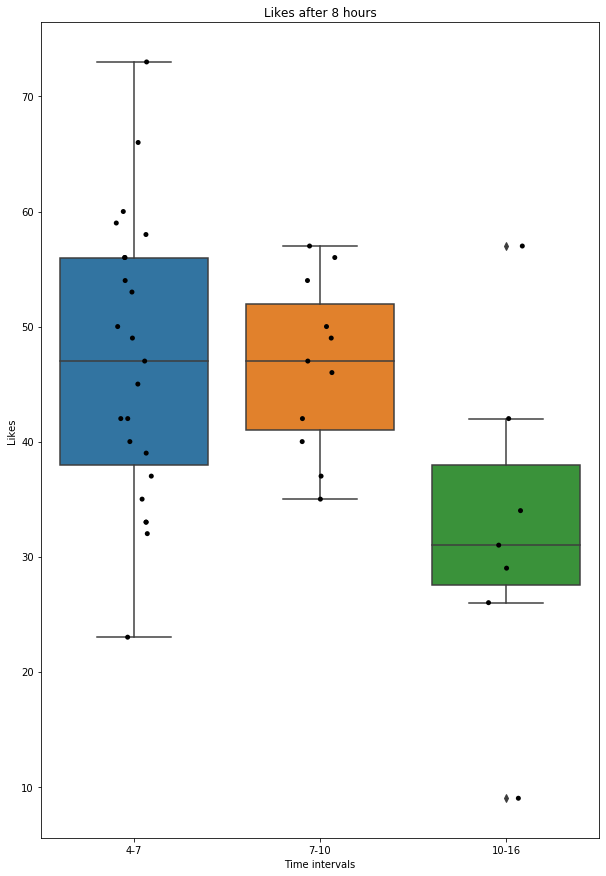

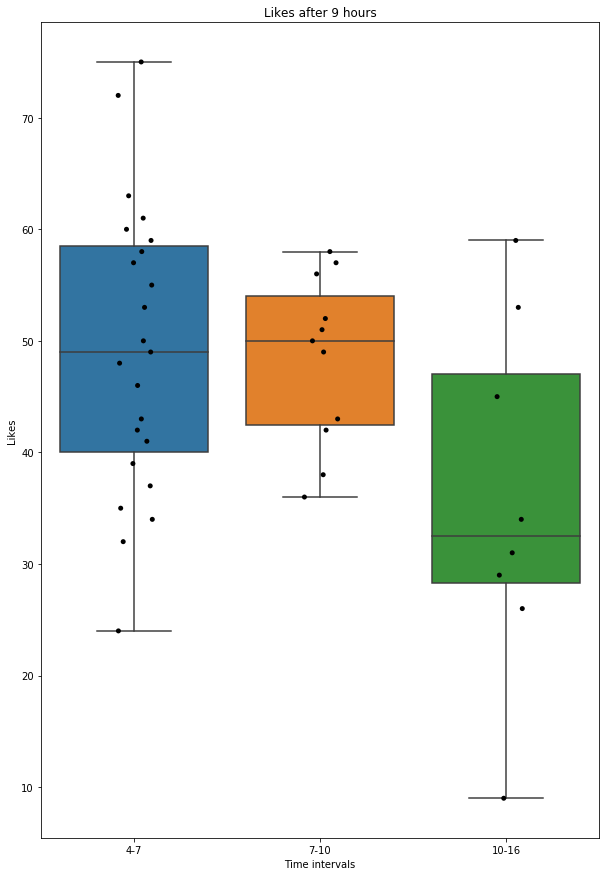

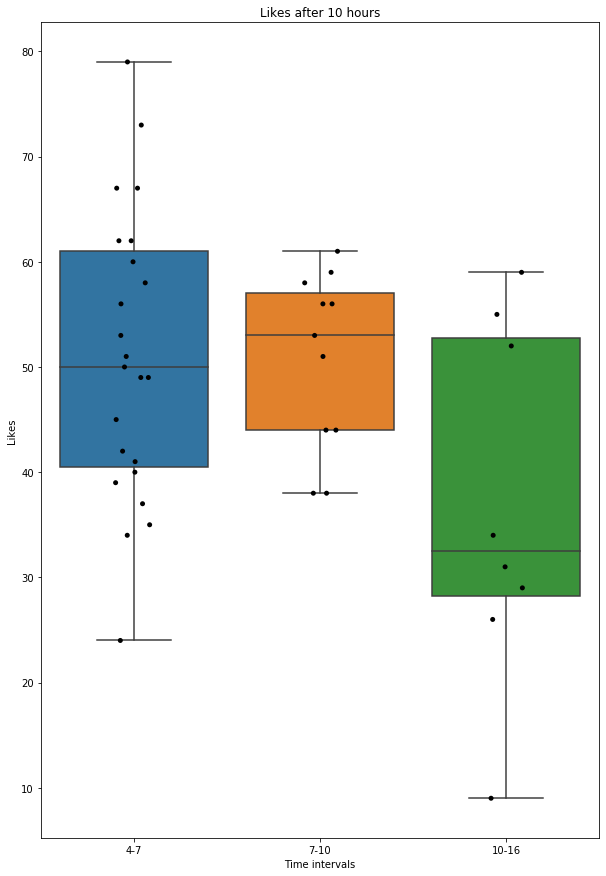

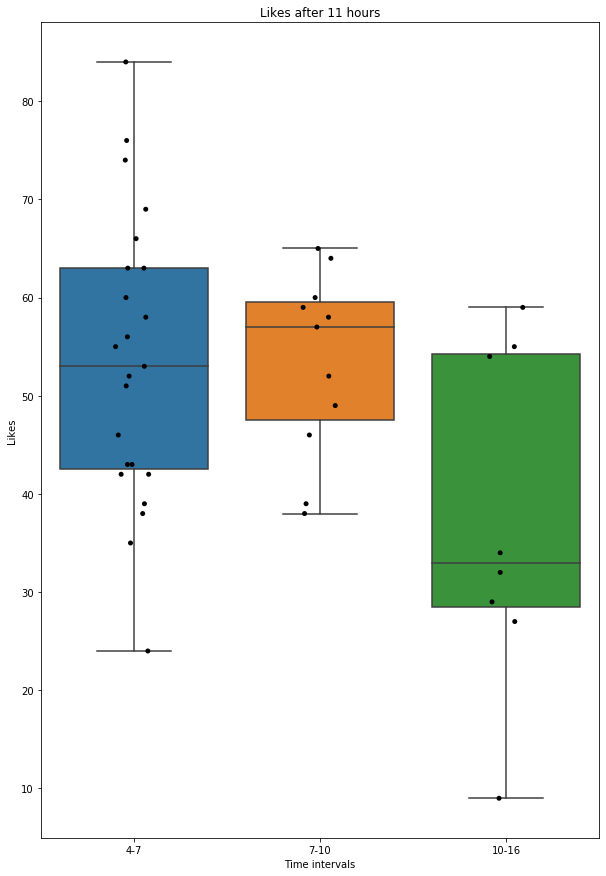

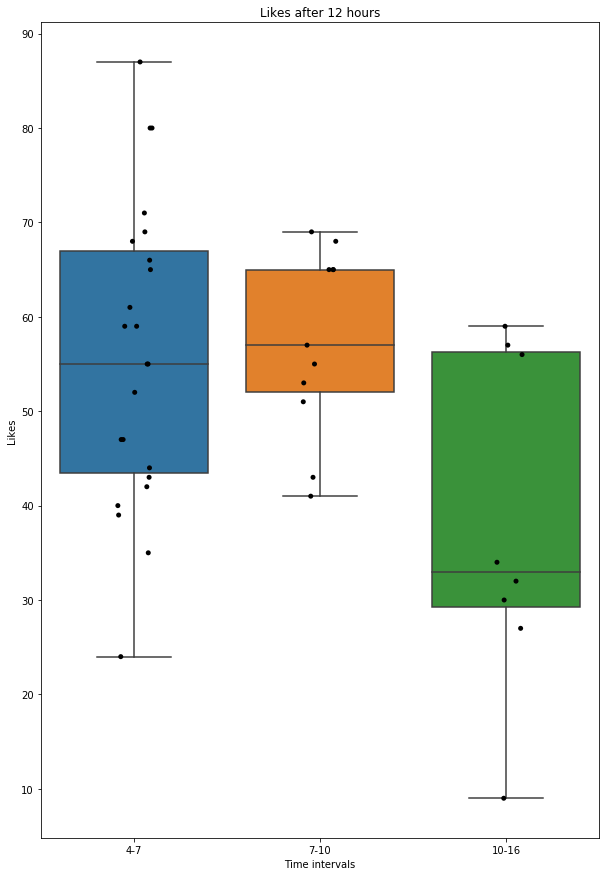

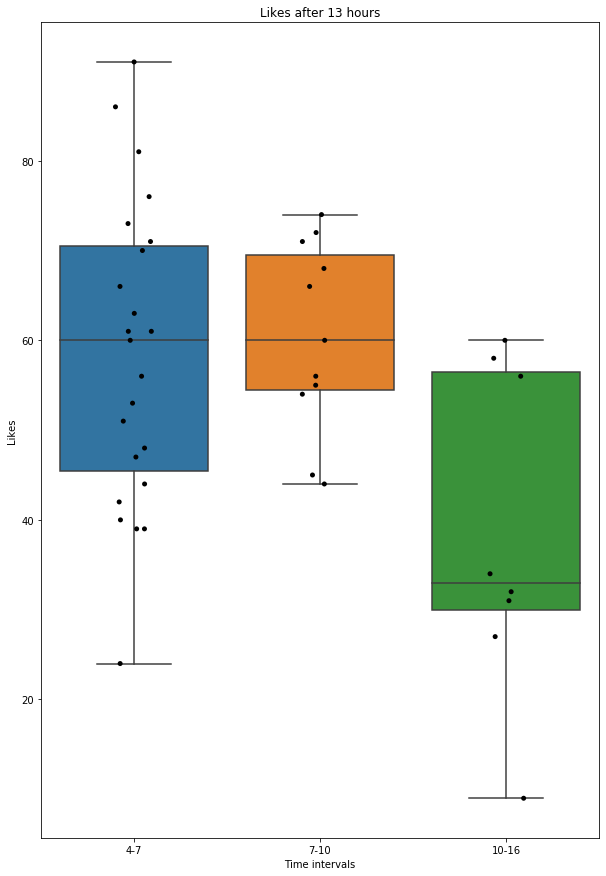

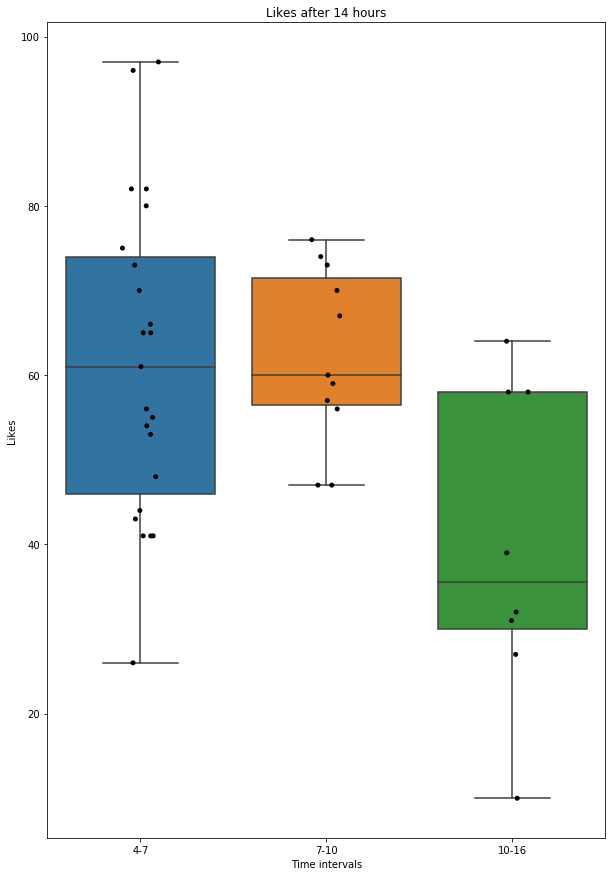

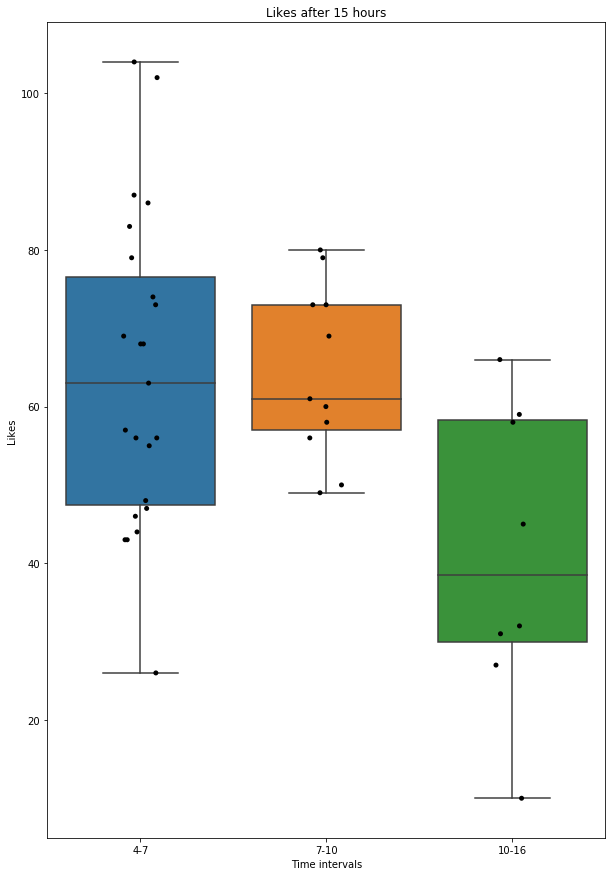

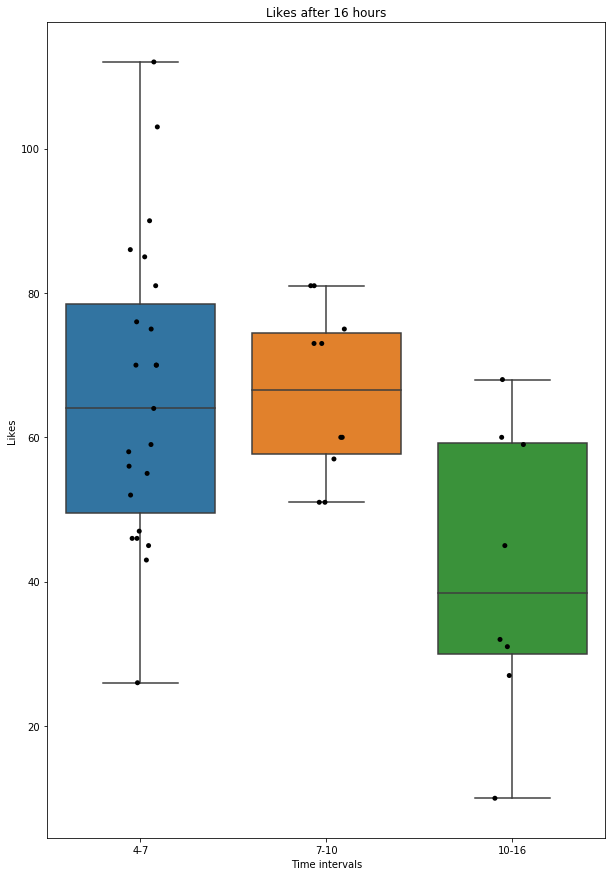

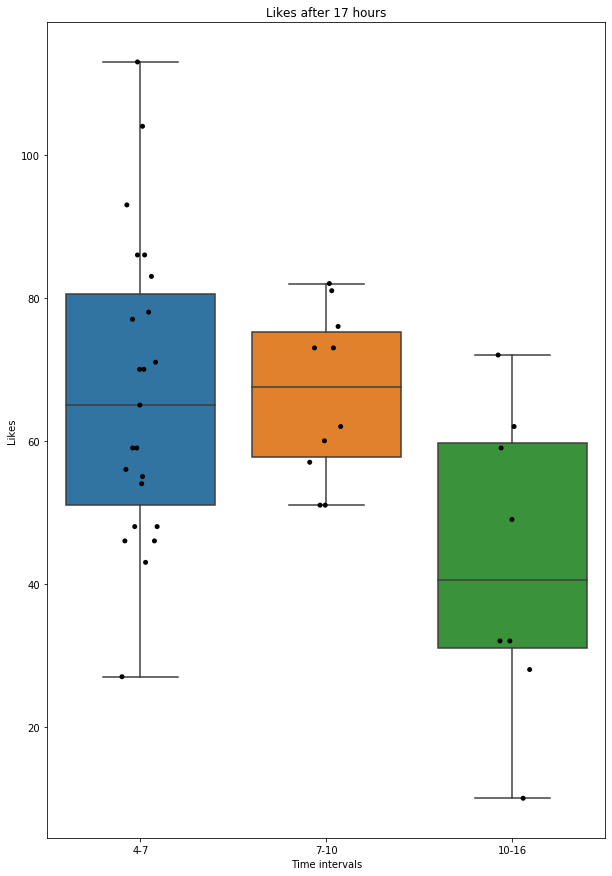

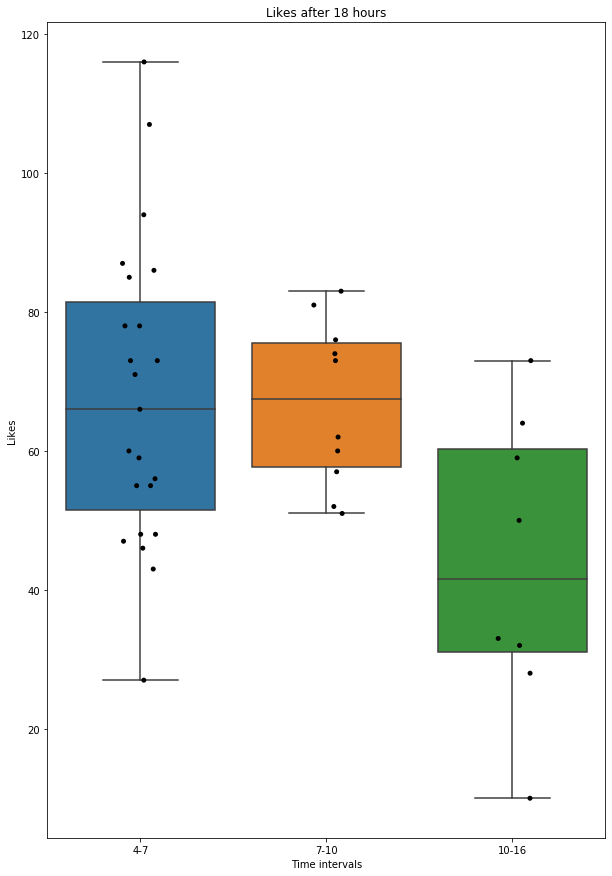

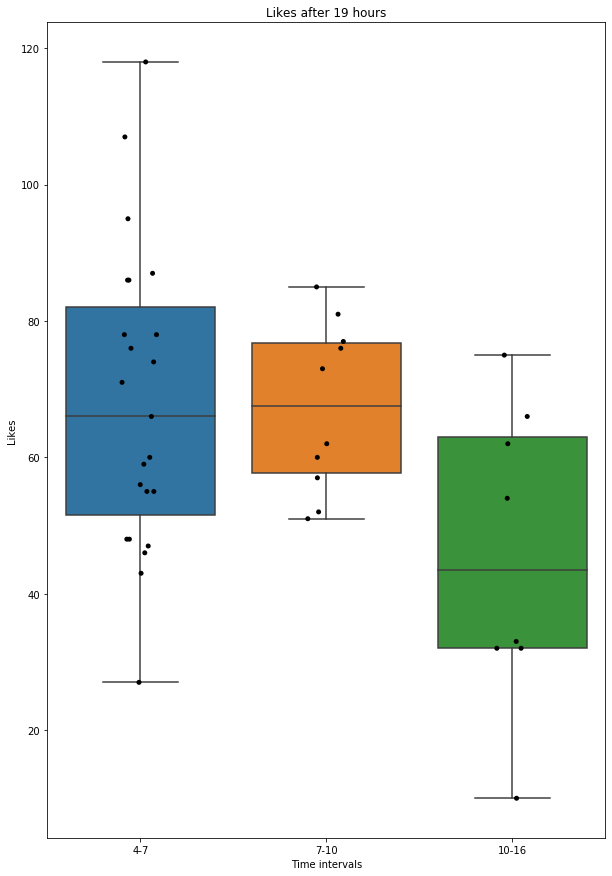

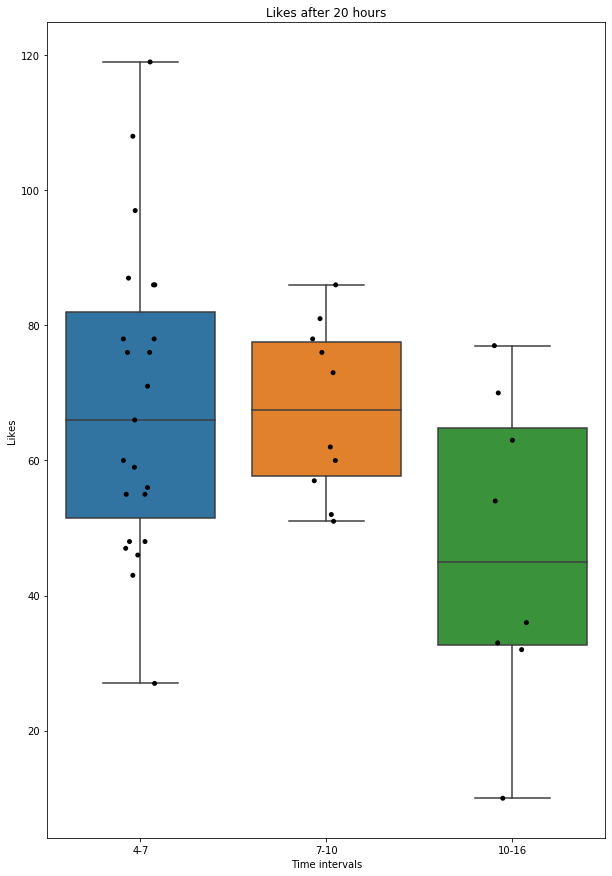

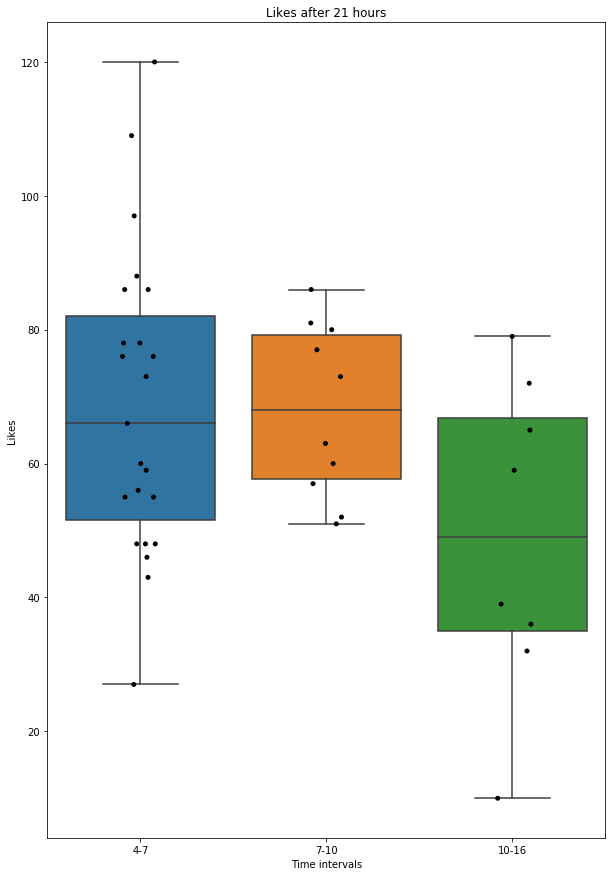

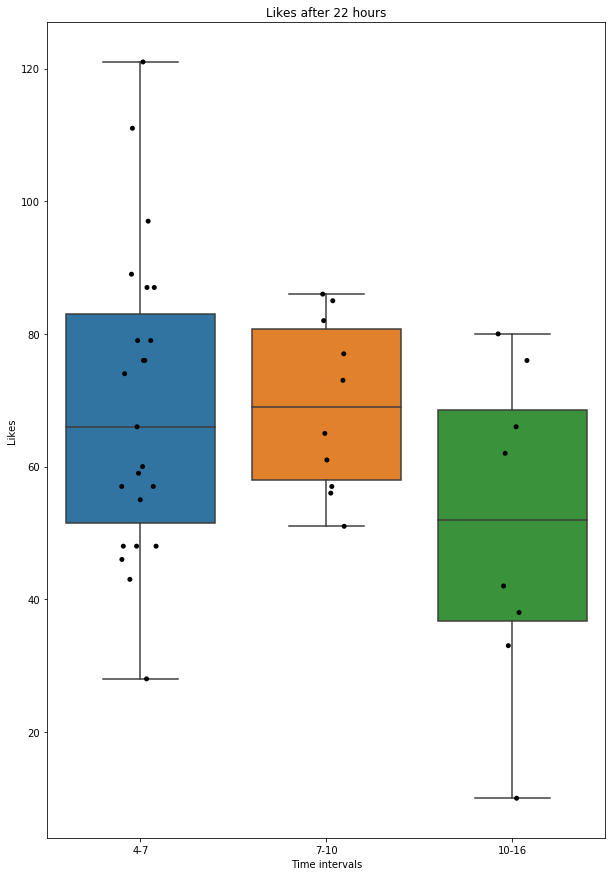

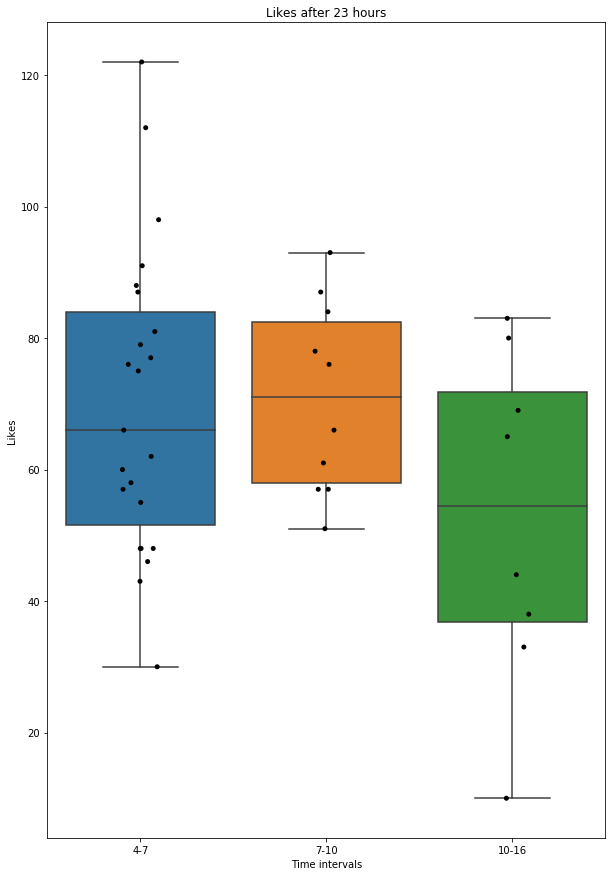

In [7]:
for time_shift, m_hours in zip(time_shift_h_list, hours_names):
    plt.figure(figsize=(10,15))
    sns.boxplot(x="Time_intervals", y="Likes", data=inst_h_d_to_use.loc[time_shift],  order=my_order)
    sns.stripplot(x="Time_intervals", y="Likes", data=inst_h_d_to_use.loc[time_shift], jitter=True,
                  color='black', order=my_order).set(title='Likes after '+m_hours, xlabel='Time intervals')
        

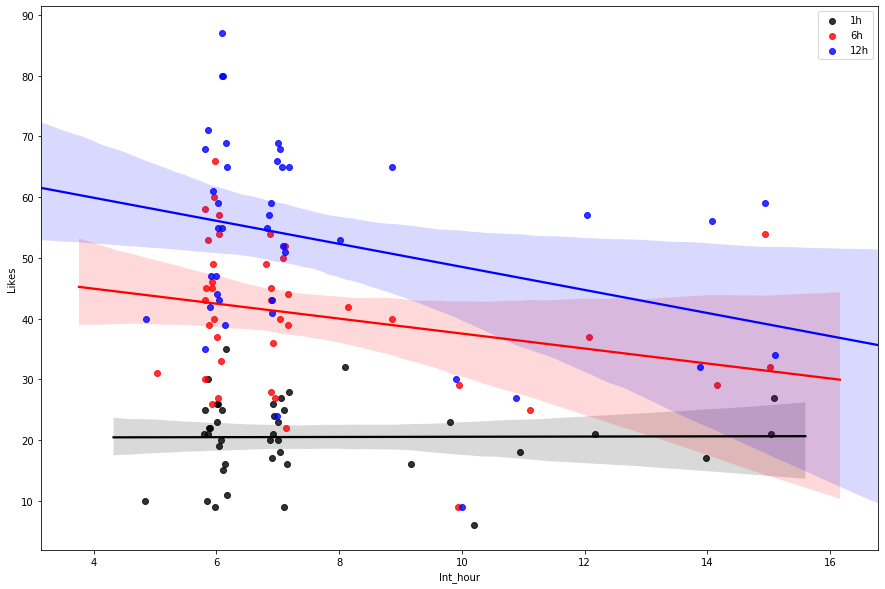

In [52]:
plt.figure(figsize=(15, 10))
sns.regplot(x='Int_hour', y='Likes', data=inst_h_d_to_use.loc['1h'], color='black', label='1h', x_jitter=0.2, fit_reg=True)
sns.regplot(x='Int_hour', y='Likes', data=inst_h_d_to_use.loc['6h'], color='red', label='6h', x_jitter=0.2,fit_reg=True)
sns.regplot(x='Int_hour', y='Likes', data=inst_h_d_to_use.loc['12h'], color='blue', label='12h', x_jitter=0.2, fit_reg=True)
plt.legend();

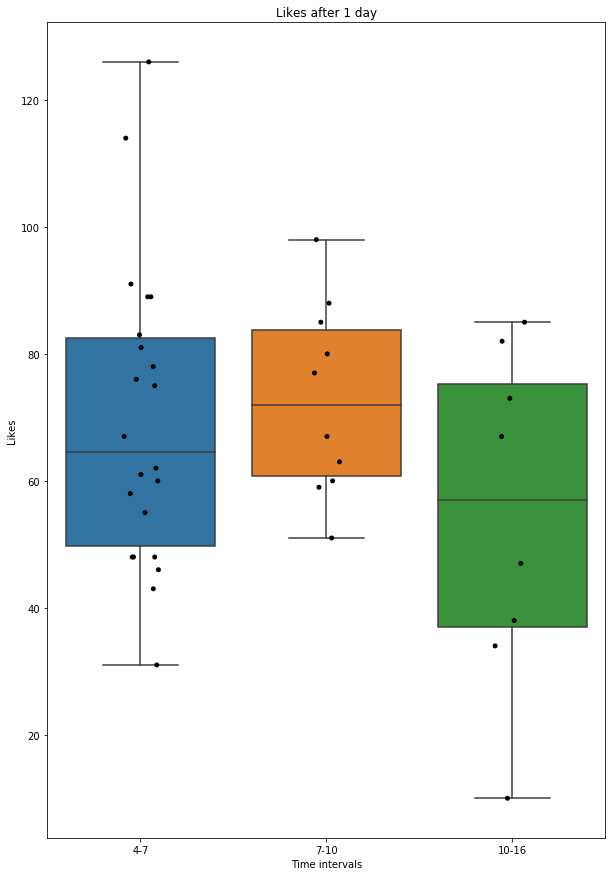

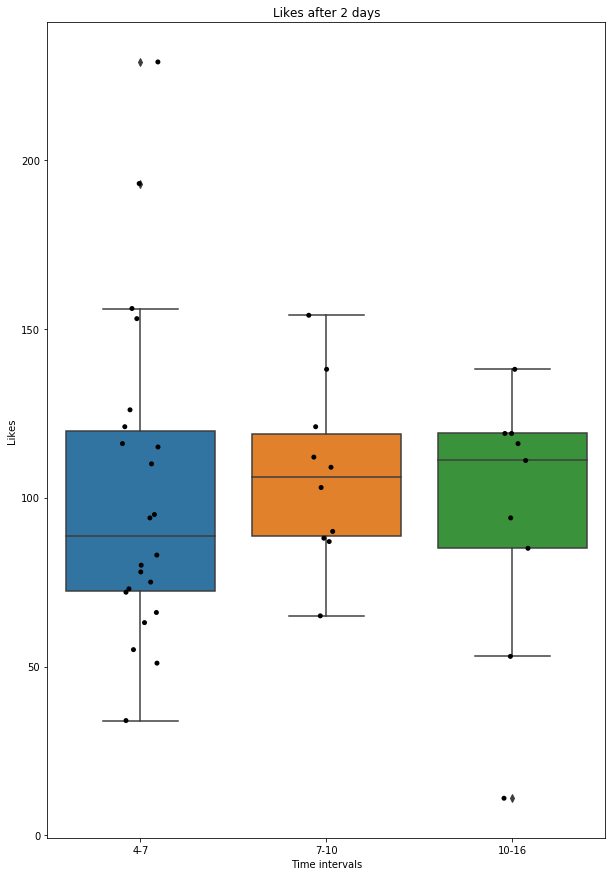

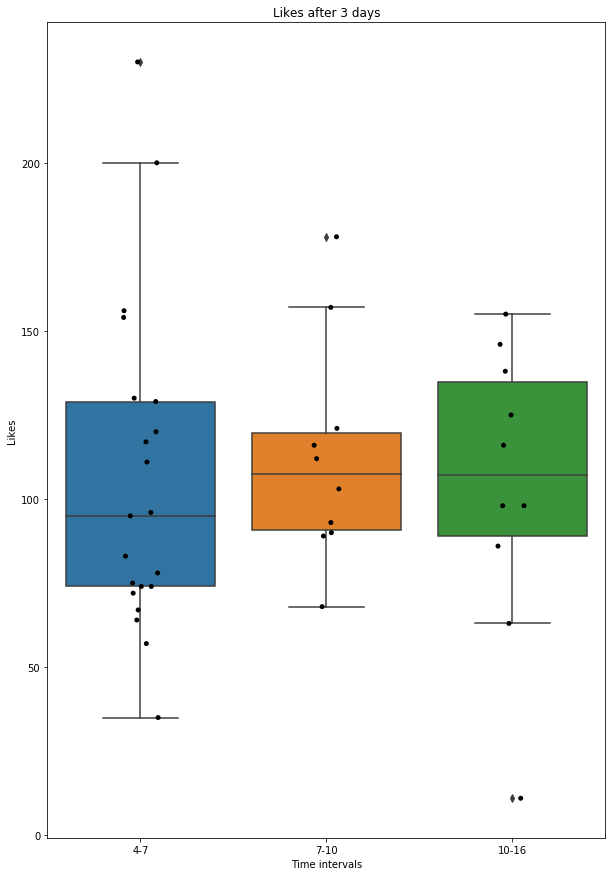

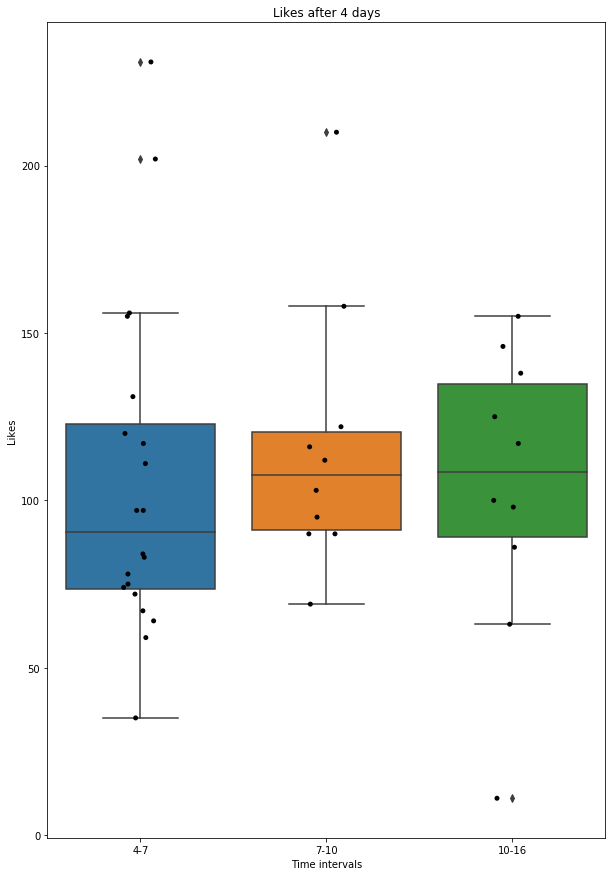

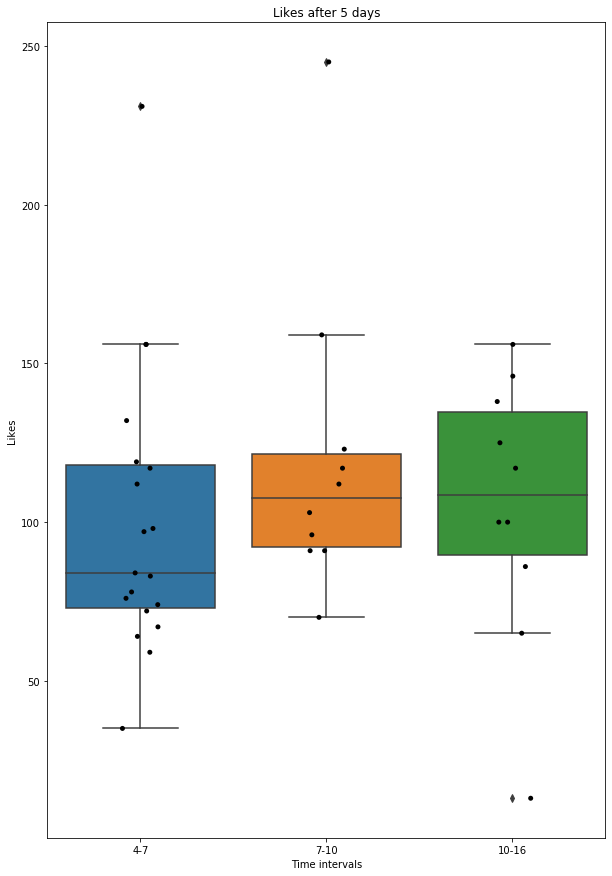

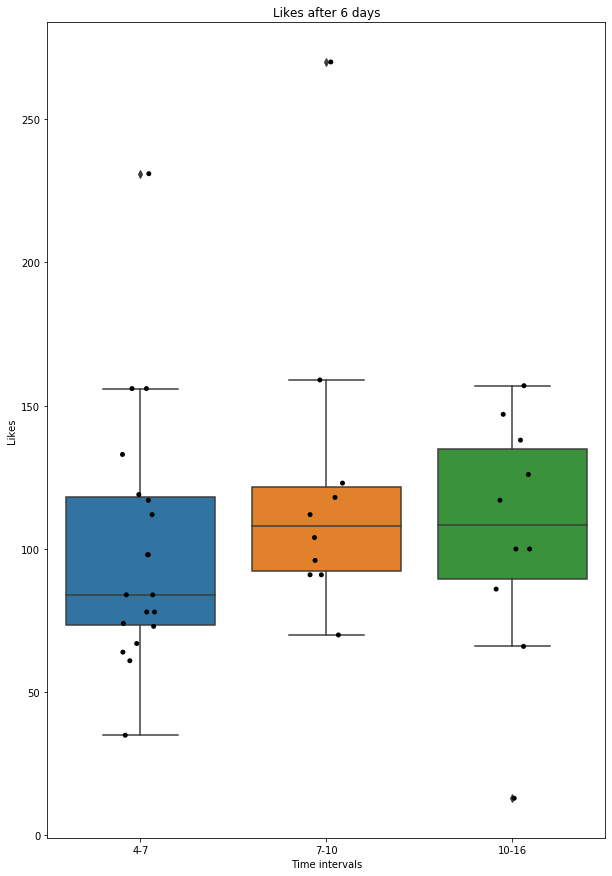

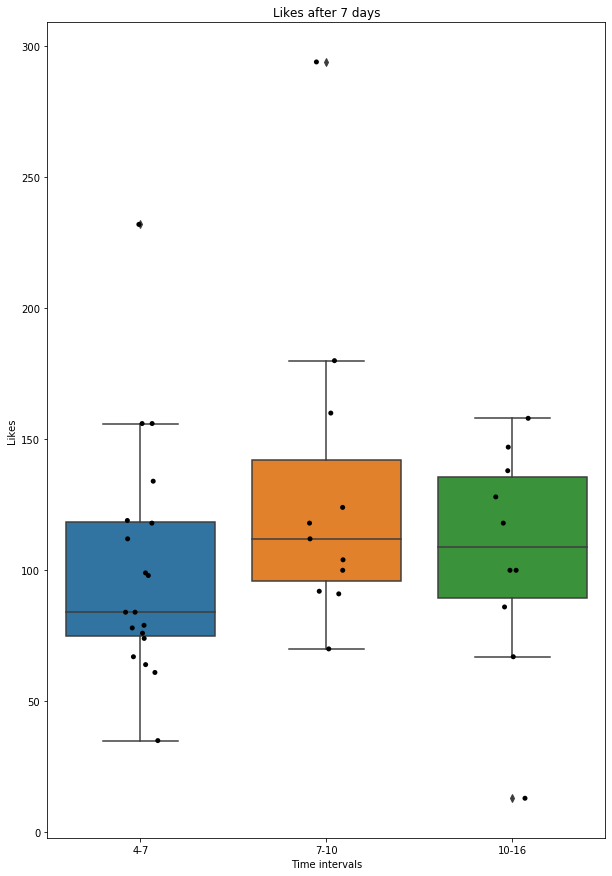

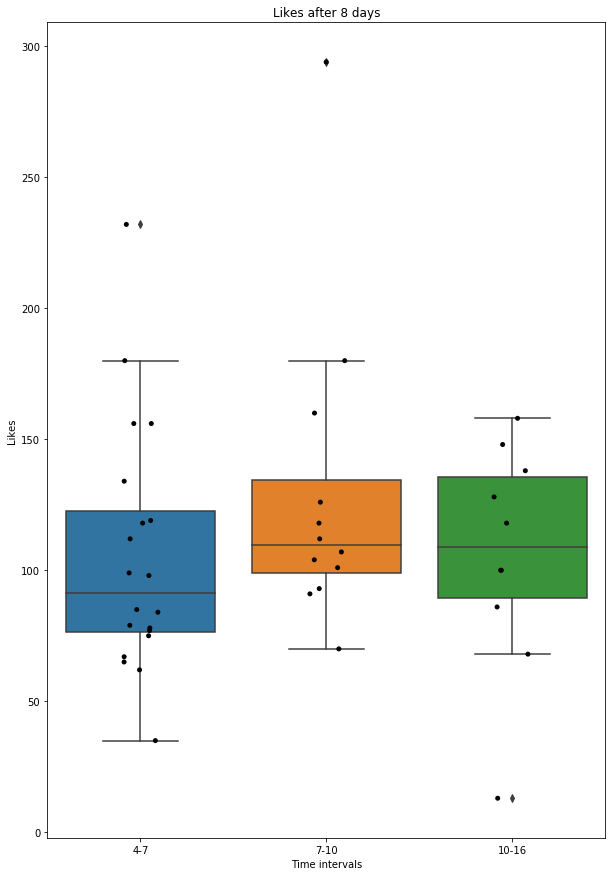

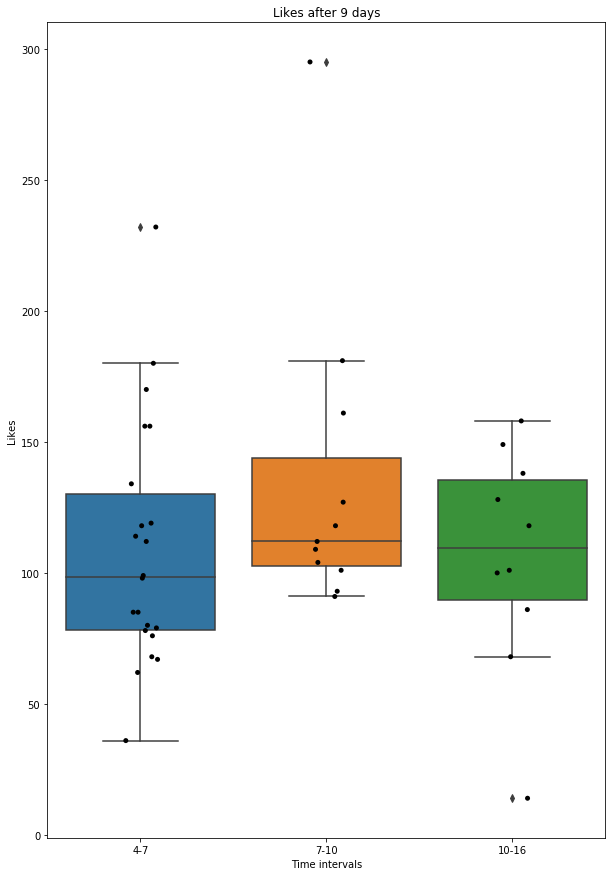

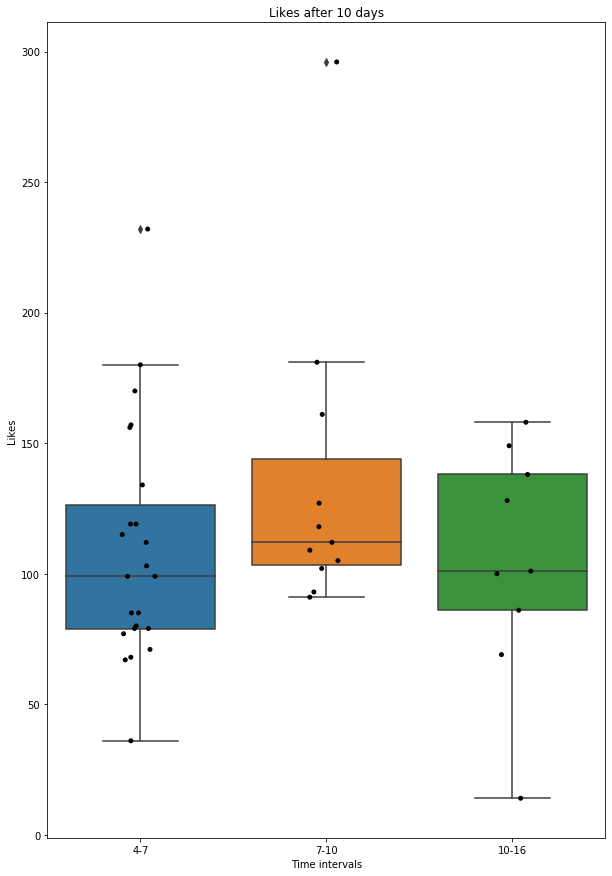

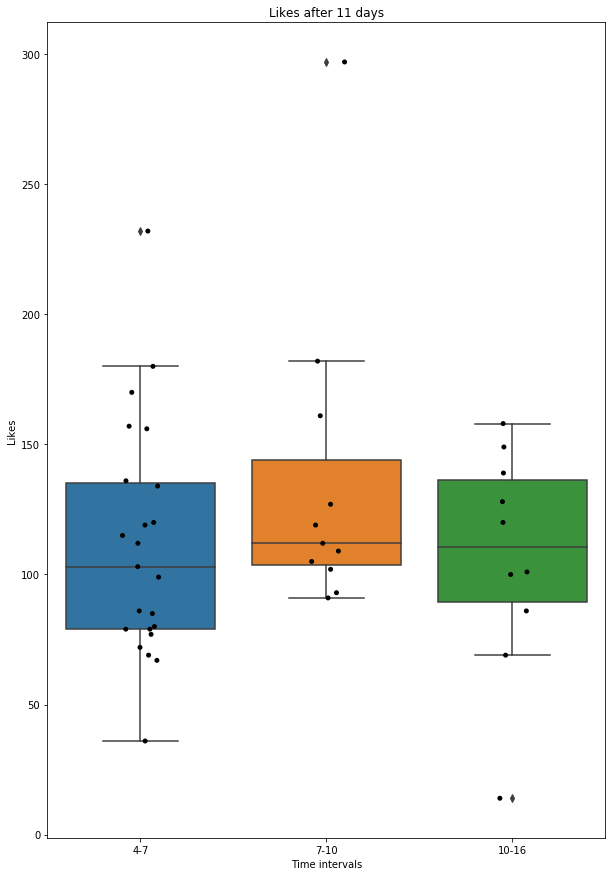

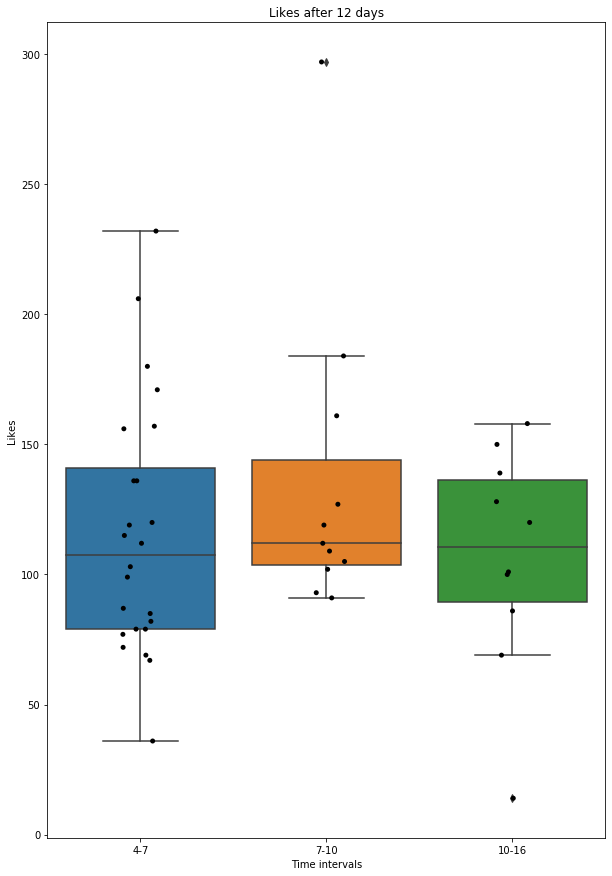

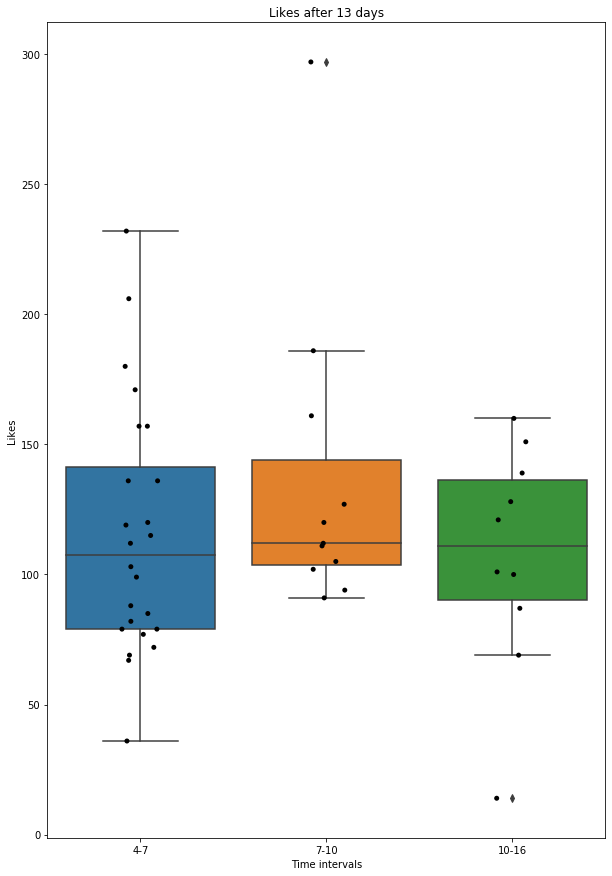

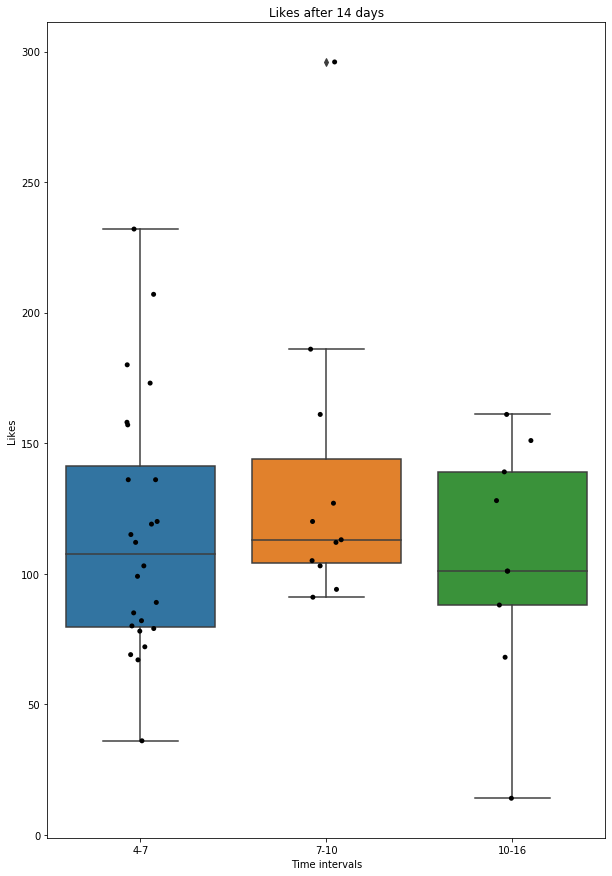

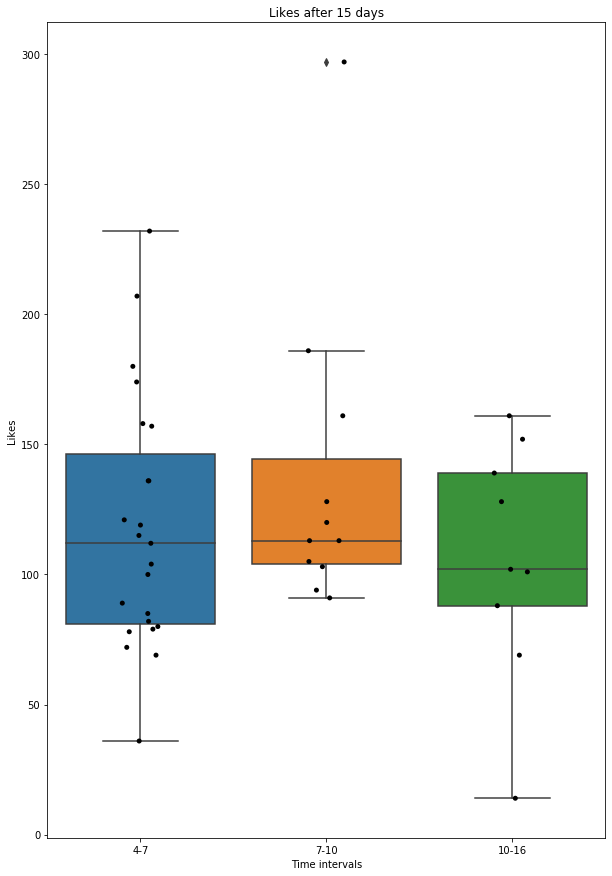

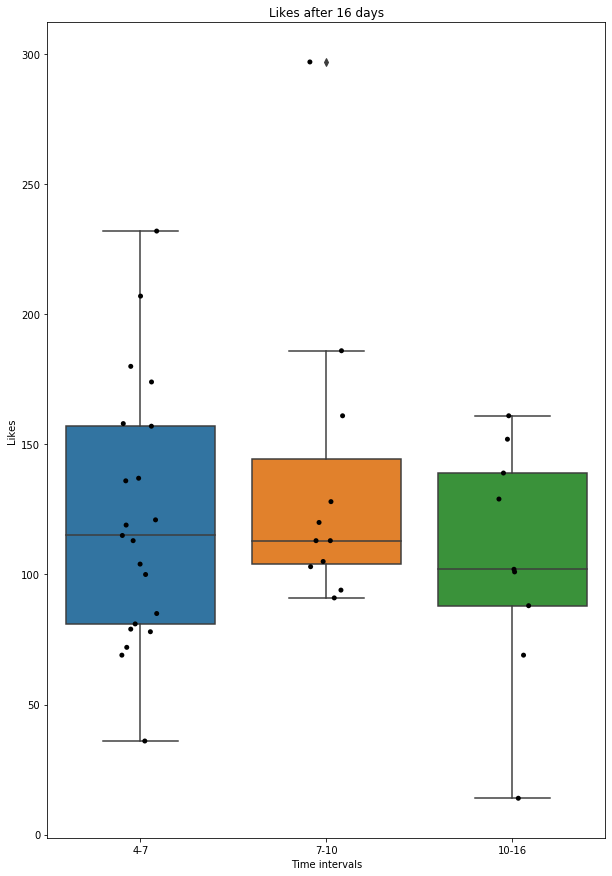

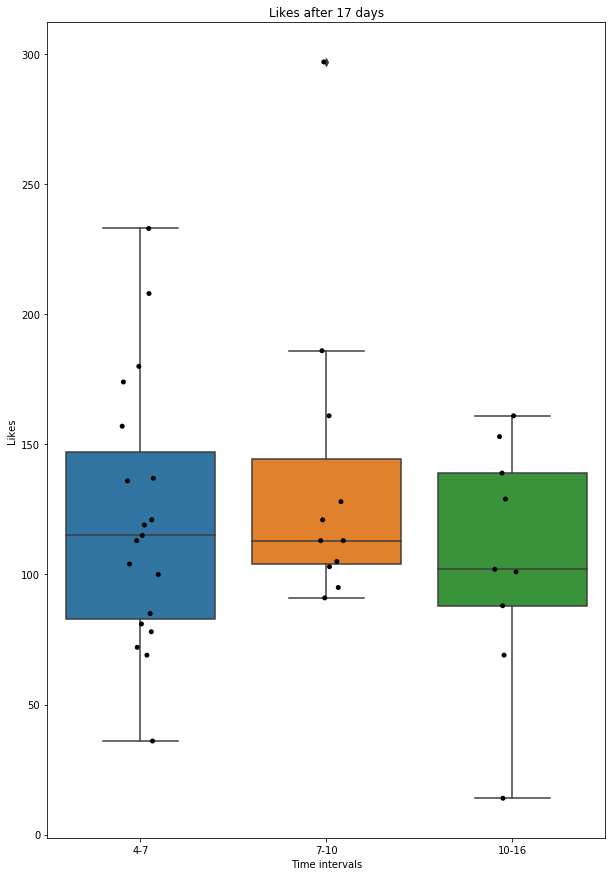

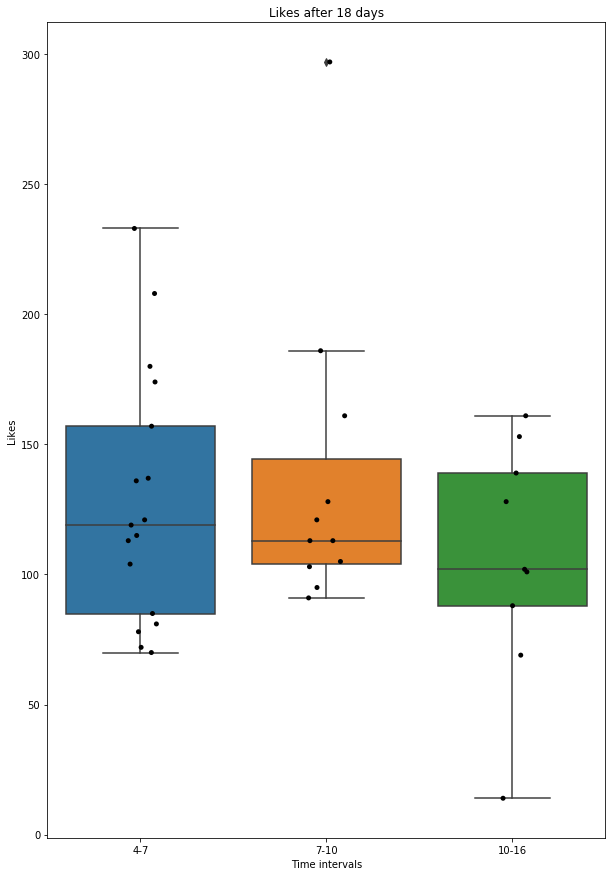

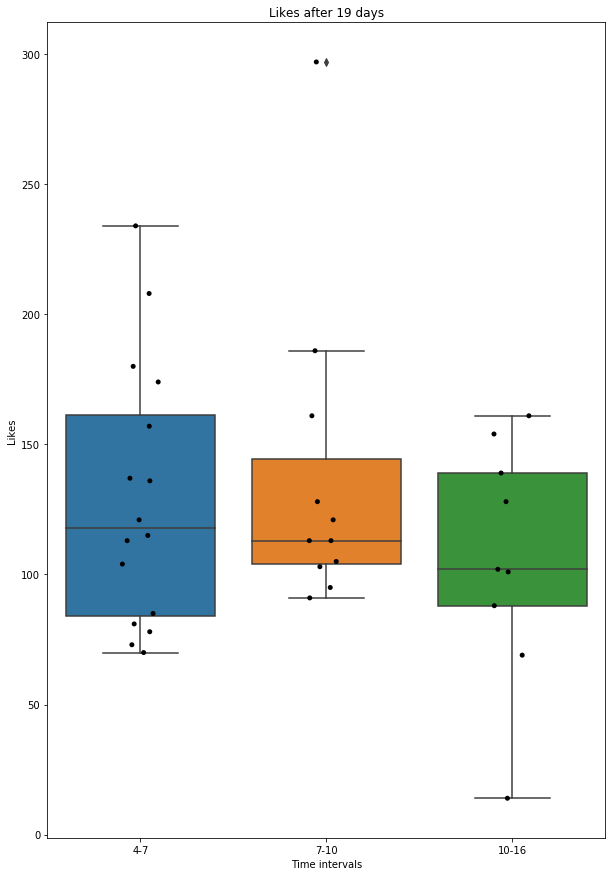

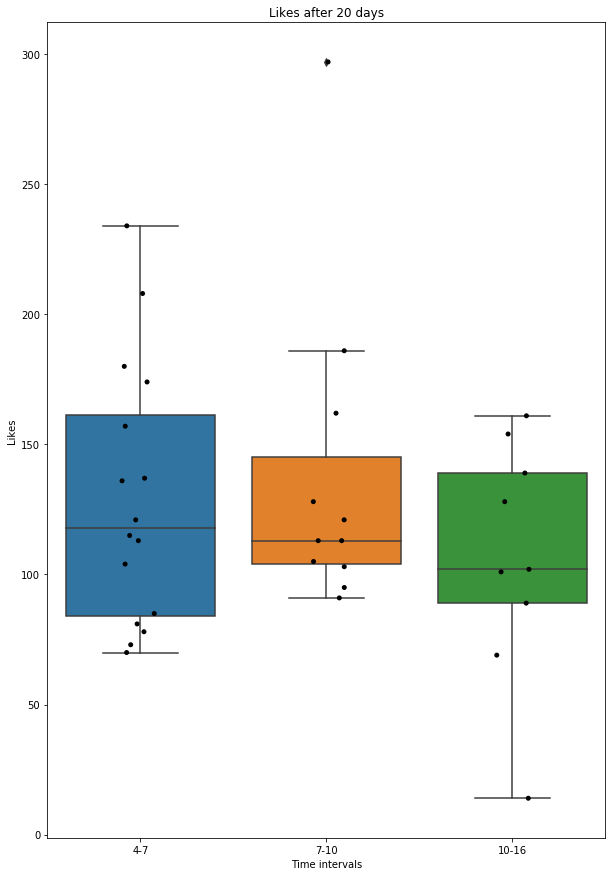

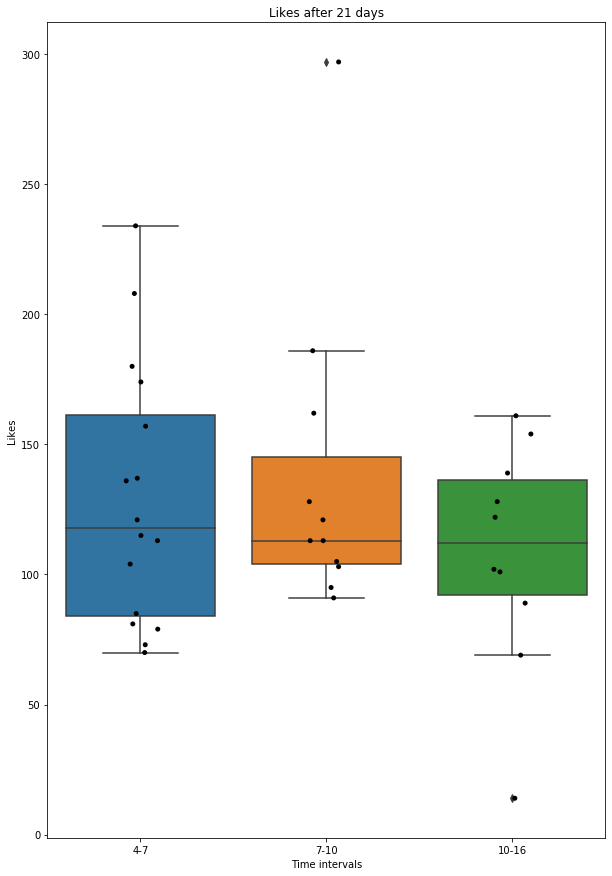

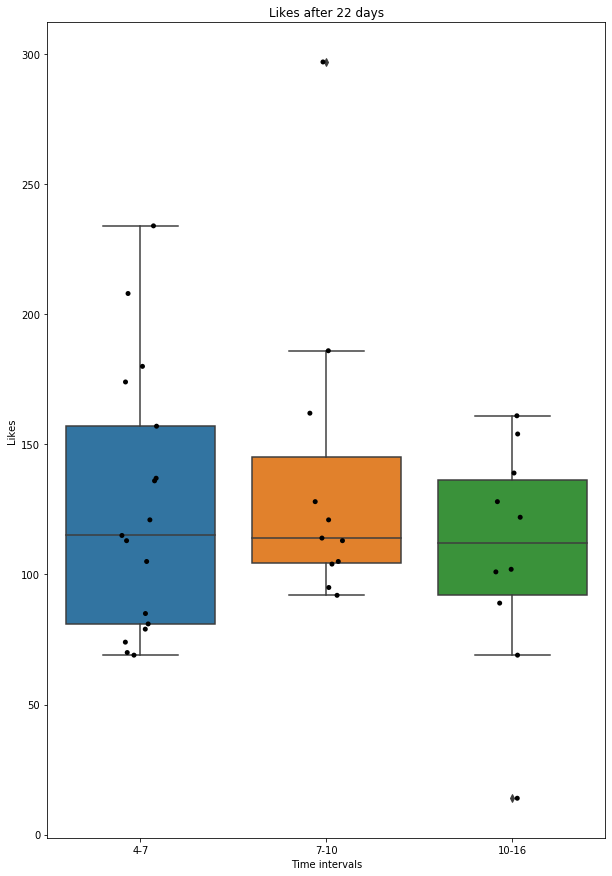

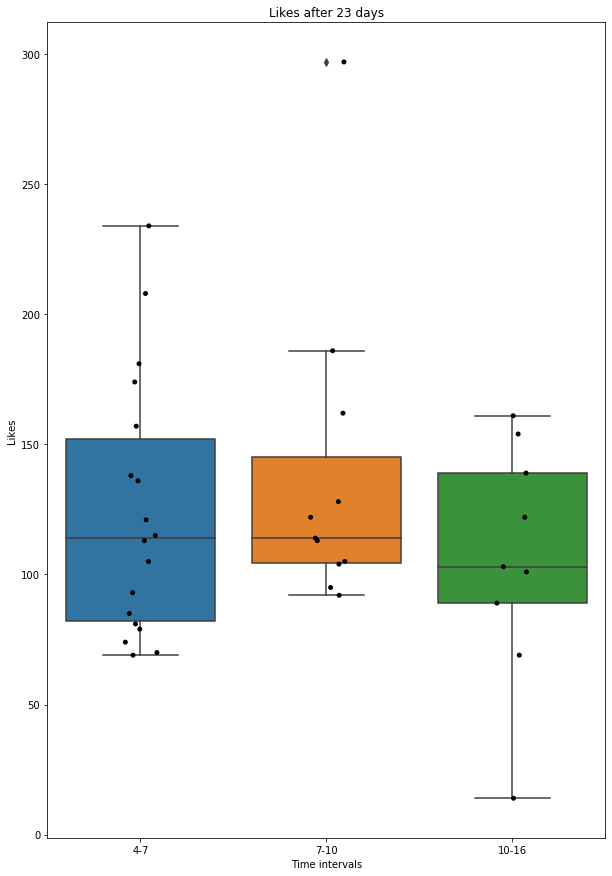

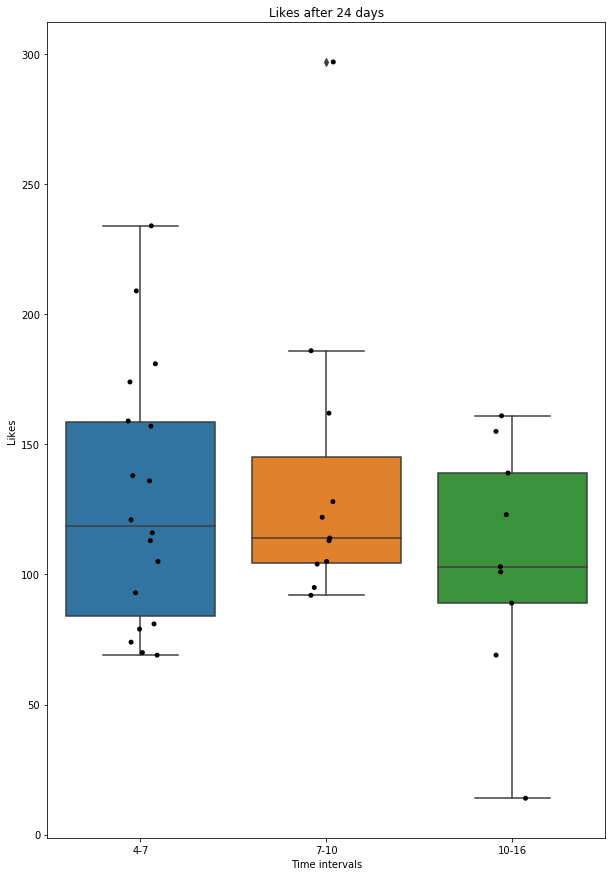

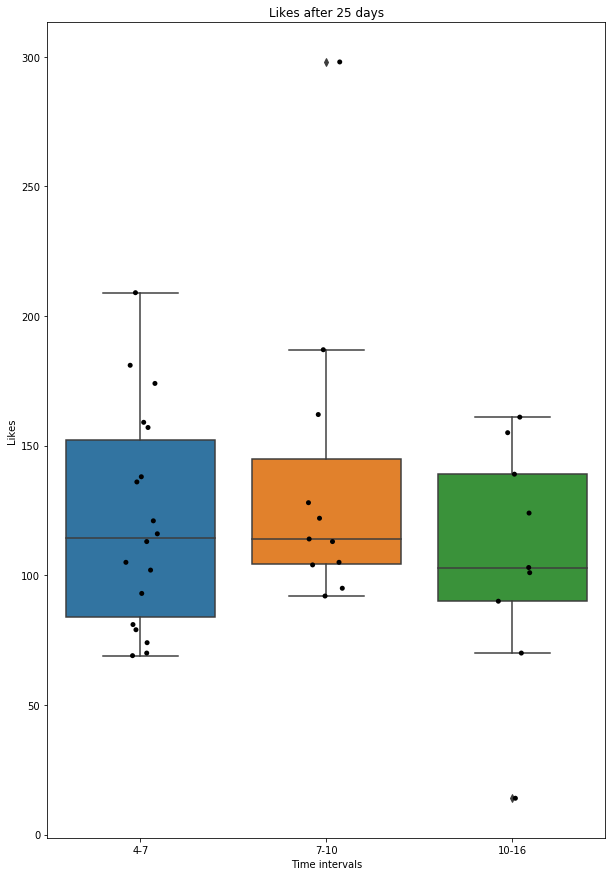

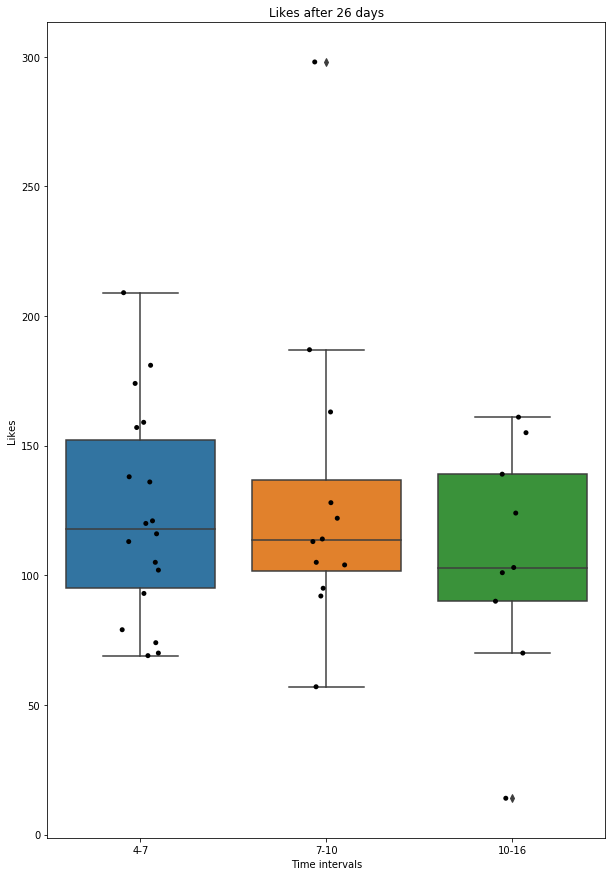

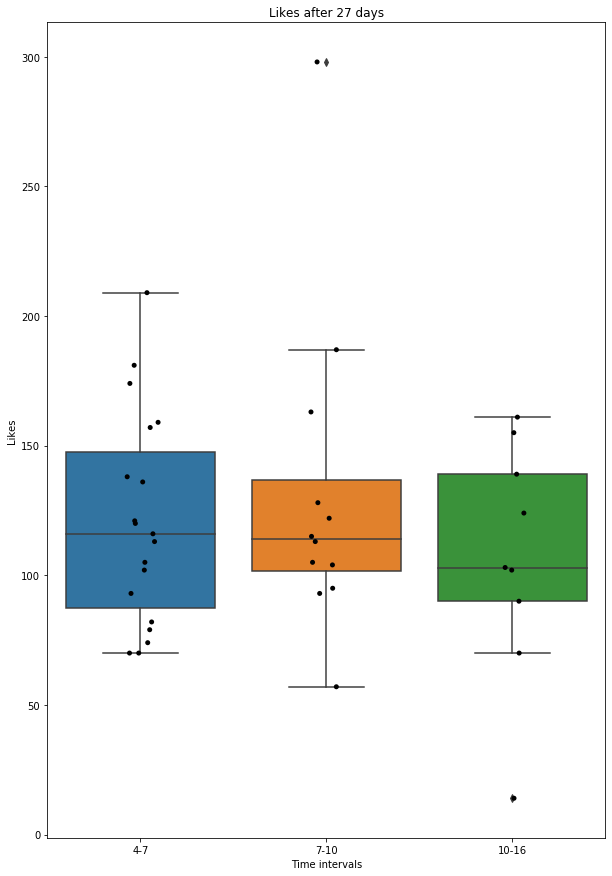

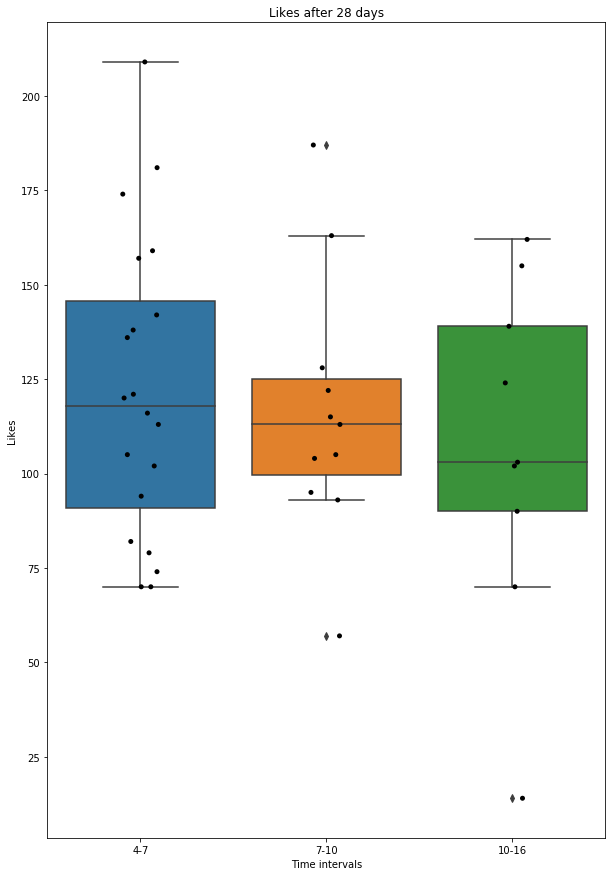

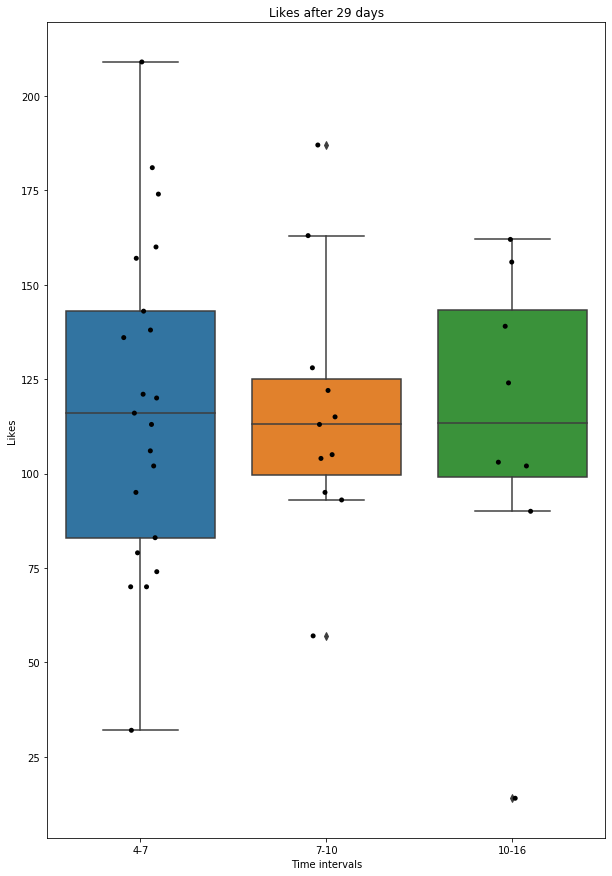

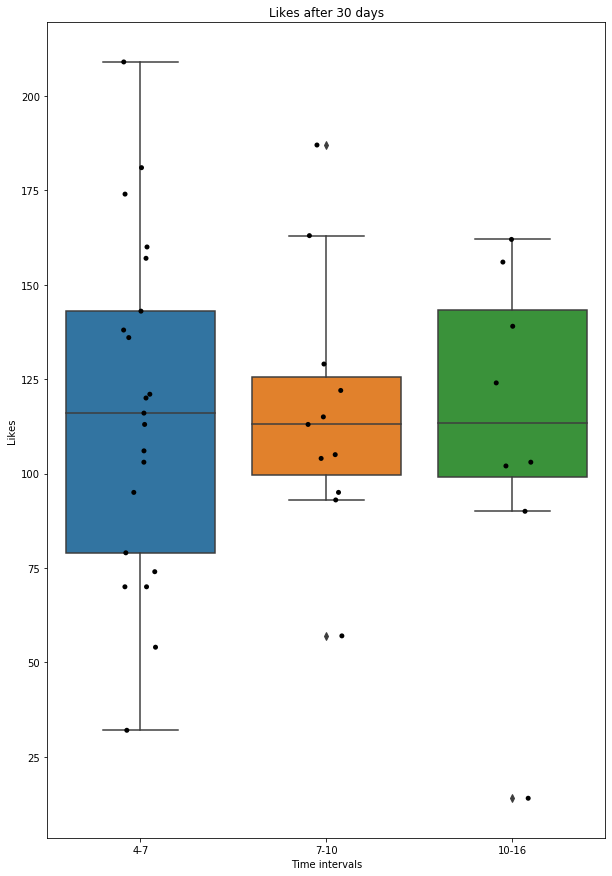

In [53]:
for time_shift, m_day in zip(time_shift_d_list, days_names):
    plt.figure(figsize=(10,15))
    sns.boxplot(x="Time_intervals", y="Likes", data=inst_h_d_to_use.loc[time_shift],  order=my_order)
    sns.stripplot(x="Time_intervals", y="Likes", data=inst_h_d_to_use.loc[time_shift], jitter=True,
                  color='black', order=my_order).set(title='Likes after '+m_day, xlabel='Time intervals')

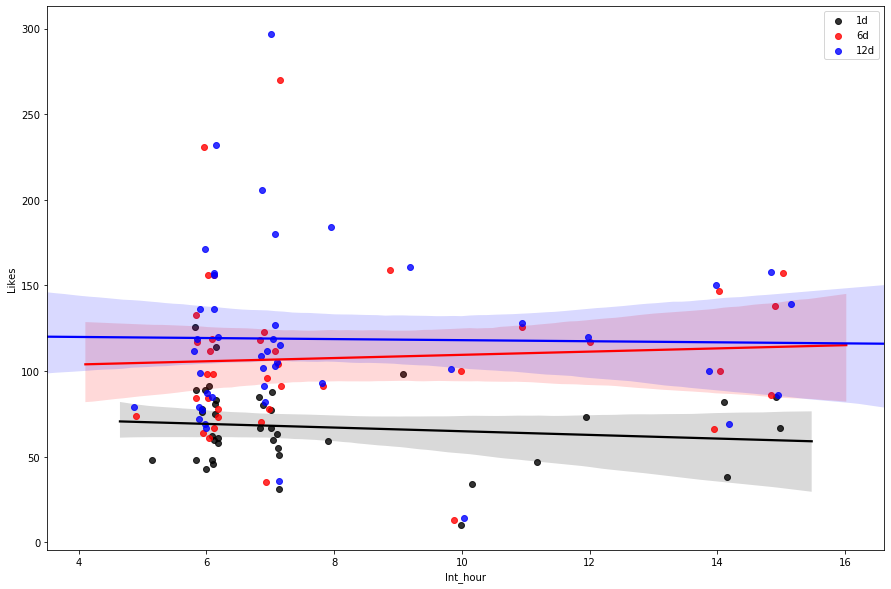

In [54]:
plt.figure(figsize=(15, 10))
sns.regplot(x='Int_hour', y='Likes', data=inst_h_d_to_use.loc['1d'], color='black', label='1d', x_jitter=0.2, fit_reg=True)
sns.regplot(x='Int_hour', y='Likes', data=inst_h_d_to_use.loc['6d'], color='red', label='6d', x_jitter=0.2,fit_reg=True)
sns.regplot(x='Int_hour', y='Likes', data=inst_h_d_to_use.loc['12d'], color='blue', label='12d', x_jitter=0.2, fit_reg=True)
plt.legend();

## Statistics

In [13]:
inst_h_d_to_use.loc['1h'][['Likes', 'Time_intervals']].groupby(['Time_intervals']).describe()

Likes                                                   
               count       mean       std   min   25%   50%   75%   max
Time_intervals                                                         
10-16            7.0  19.000000  6.608076   6.0  17.5  21.0  22.0  27.0
4-7             23.0  20.217391  6.980209   9.0  15.5  21.0  25.0  35.0
7-10            11.0  22.090909  5.467258  16.0  17.5  20.0  26.5  32.0

In [14]:
inst_h_d_to_use.loc['6h'][['Likes', 'Time_intervals']].groupby(['Time_intervals']).describe()

Likes                                                    
               count       mean        std   min   25%   50%   75%   max
Time_intervals                                                          
10-16            7.0  30.714286  13.499559   9.0  27.0  29.0  34.5  54.0
4-7             23.0  43.391304  11.884823  22.0  35.0  44.0  53.5  66.0
7-10            11.0  41.090909   8.239594  27.0  38.0  42.0  47.0  52.0

In [9]:
inst_h_d_to_use.loc['12h'][['Likes', 'Time_intervals']].groupby(['Time_intervals']).describe()

Likes                                                      
               count       mean        std   min    25%   50%    75%   max
Time_intervals                                                            
10-16            8.0  38.000000  17.744214   9.0  29.25  33.0  56.25  59.0
4-7             23.0  56.000000  15.917400  24.0  43.50  55.0  67.00  87.0
7-10            11.0  57.454545   9.811867  41.0  52.00  57.0  65.00  69.0

In [16]:
inst_h_d_to_use.loc['1d'][['Likes', 'Time_intervals']].groupby(['Time_intervals']).describe()

Likes                                                  
               count  mean        std   min    25%   50%    75%    max
Time_intervals                                                        
10-16            8.0  54.5  26.495283  10.0  37.00  57.0  75.25   85.0
4-7             22.0  69.5  23.447510  31.0  49.75  64.5  82.50  126.0
7-10            10.0  72.8  15.068731  51.0  60.75  72.0  83.75   98.0

In [17]:
inst_h_d_to_use.loc['6d'][['Likes', 'Time_intervals']].groupby(['Time_intervals']).describe()

Likes                                                          
               count        mean        std   min    25%    50%     75%    max
Time_intervals                                                                
10-16           10.0  105.000000  42.866719  13.0  89.50  108.5  135.00  157.0
4-7             19.0  100.947368  44.921504  35.0  73.50   84.0  118.00  231.0
7-10            10.0  123.400000  56.761098  70.0  92.25  108.0  121.75  270.0

In [18]:
inst_h_d_to_use.loc['12d'][['Likes', 'Time_intervals']].groupby(['Time_intervals']).describe()

Likes                                                          
               count        mean        std   min    25%    50%     75%    max
Time_intervals                                                                
10-16           10.0  106.500000  43.076805  14.0   89.5  110.5  136.25  158.0
4-7             24.0  115.625000  48.192379  36.0   79.0  107.5  141.00  232.0
7-10            11.0  136.363636  60.427267  91.0  103.5  112.0  144.00  297.0

### Correlation

In [10]:
ind_names = ('1h', '6h', '12h', '1d', '6d', '12d')
corr_dict = {'%s' %ind :inst_h_d_to_use.loc[ind]['Likes'].corr(inst_h_d_to_use.loc[ind]['Int_hour']) for ind in ind_names}
for name, corr in corr_dict.items():
    print('%s: %s\n' %(name, corr))

1h: 0.006522701649949623

6h: -0.25816888239888214

12h: -0.31037895946598903

1d: -0.12875793666188126

6d: 0.06196442375367117

12d: -0.01825883695090743



## Tests

In [30]:
kruskal(*[group["Likes"].values for _, group in inst_h_d_to_use.loc['1h'][['Likes', 'Time_intervals']].groupby(['Time_intervals'])])

KruskalResult(statistic=0.5451066869719103, pvalue=0.7614328106114083)

In [31]:
kruskal(*[group["Likes"].values for _, group in inst_h_d_to_use.loc['6h'][['Likes', 'Time_intervals']].groupby(['Time_intervals'])])

KruskalResult(statistic=4.95897523459297, pvalue=0.0837861451672109)

In [32]:
kruskal(*[group["Likes"].values for _, group in inst_h_d_to_use.loc['12h'][['Likes', 'Time_intervals']].groupby(['Time_intervals'])])

KruskalResult(statistic=6.417241478486145, pvalue=0.04041231396906232)

In [55]:
sp.posthoc_dunn(inst_h_d_to_use.loc['12h'][['Likes', 'Time_intervals']], val_col='Likes', group_col='Time_intervals', p_adjust = 'holm')

,10-16,4-7,7-10
10-16,-1.00000,0.059970,0.059970
4-7,0.05997,-1.000000,0.773932
7-10,0.05997,0.773932,-1.000000


In [34]:
kruskal(*[group["Likes"].values for _, group in inst_h_d_to_use.loc['1d'][['Likes', 'Time_intervals']].groupby(['Time_intervals'])])

KruskalResult(statistic=2.5245465856802687, pvalue=0.2830099302193677)

In [35]:
kruskal(*[group["Likes"].values for _, group in inst_h_d_to_use.loc['6d'][['Likes', 'Time_intervals']].groupby(['Time_intervals'])])

KruskalResult(statistic=2.0618922204213987, pvalue=0.3566693523709274)

In [36]:
kruskal(*[group["Likes"].values for _, group in inst_h_d_to_use.loc['12d'][['Likes', 'Time_intervals']].groupby(['Time_intervals'])])

KruskalResult(statistic=1.354013444049031, pvalue=0.5081357096884614)

In [37]:
kruskal(*[group["Likes"].values for _, group in inst_h_d_to_use.loc['12d'][['Likes', 'Time_intervals']].groupby(['Time_intervals'])])

KruskalResult(statistic=1.354013444049031, pvalue=0.5081357096884614)

## Number of likes in time intervals

### Each photo as single observation

In [7]:
diff_pipe = Pipeline([('diff_maker', select_by_time(time_freq='3h')),
                      ('add_intervals', hours_interval(dividing_points=range(0, 25, 3),
                                                       low_int=True, int_time_col='Time',
                                                       full_day=True))])
inst_diff_likes = diff_pipe.transform(instagram)

In [8]:
inst_no0_diff_likes = inst_diff_likes.loc[inst_diff_likes.Diff_likes != 0]

#### Plots

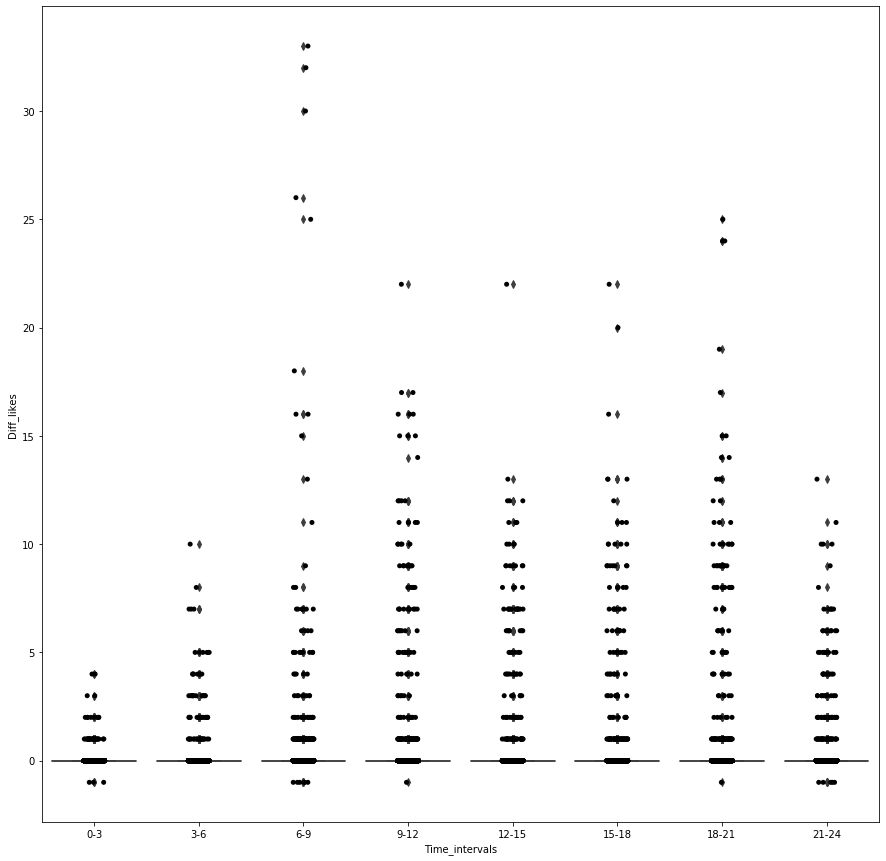

In [5]:
plt.figure(figsize=(15,15))
sns.boxplot(x="Time_intervals", y="Diff_likes", data=inst_diff_likes)
sns.stripplot(x="Time_intervals", y="Diff_likes", data=inst_diff_likes, jitter=True,
              color='black');

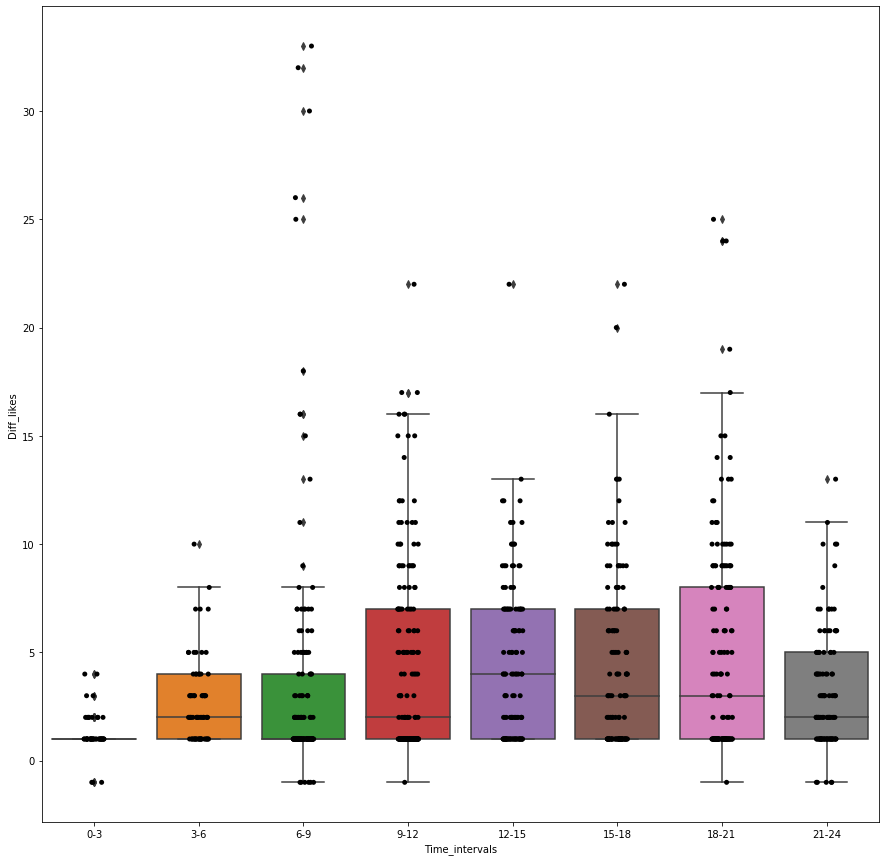

In [6]:
plt.figure(figsize=(15,15))
sns.boxplot(x="Time_intervals", y="Diff_likes", data=inst_no0_diff_likes)
sns.stripplot(x="Time_intervals", y="Diff_likes", data=inst_no0_diff_likes, jitter=True,
              color='black');

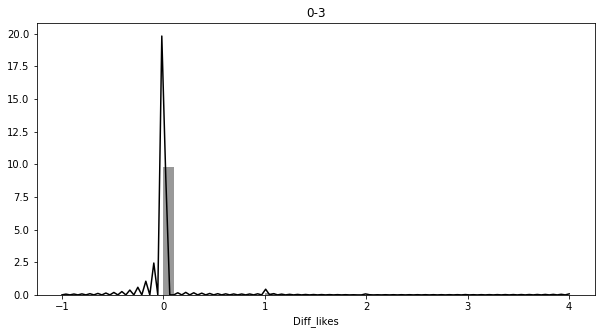

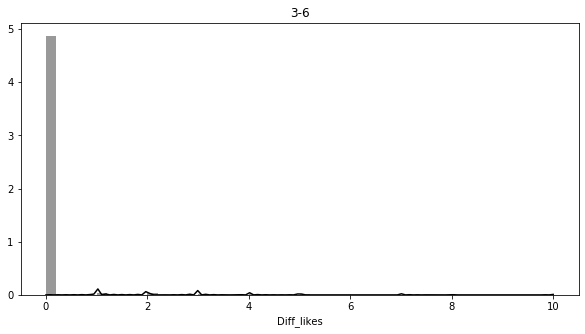

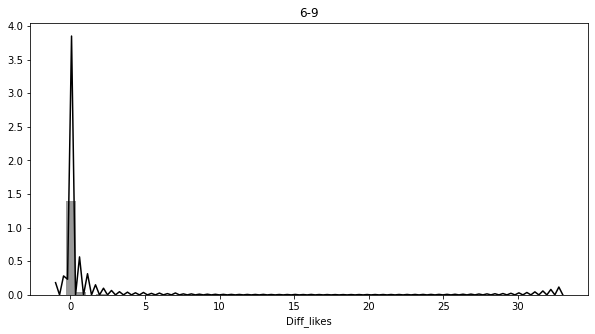

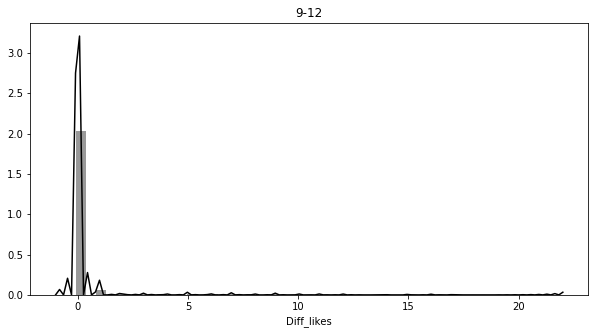

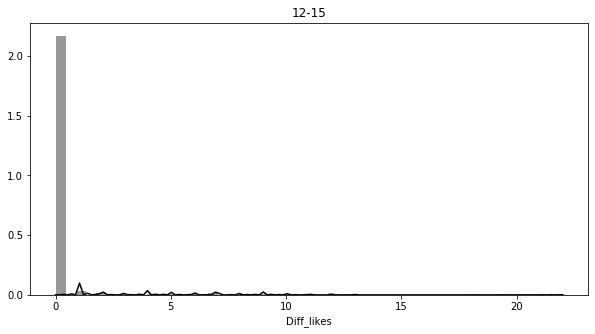

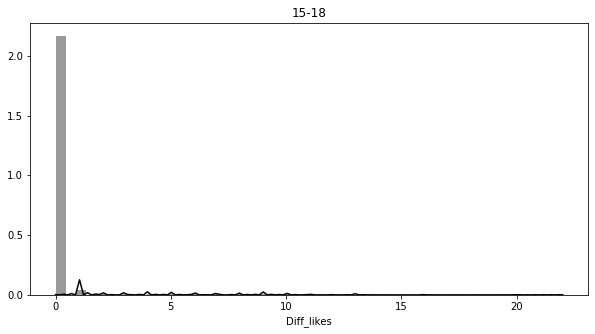

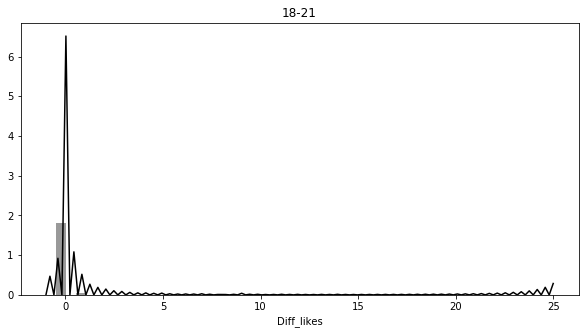

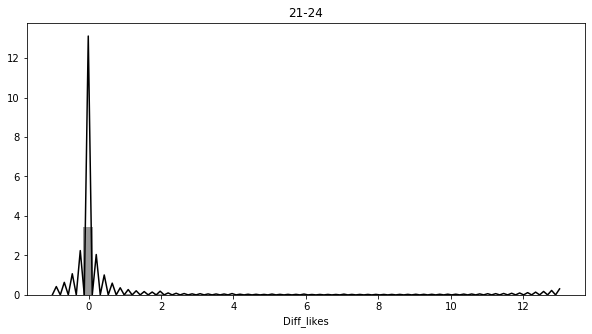

In [32]:
time_int_hist = inst_no0_diff_likes.Time_intervals.unique()
for time_int in time_int_hist:
    plt.figure(figsize=(10,5))
    sns.distplot(inst_diff_likes.loc[inst_diff_likes.Time_intervals == time_int]['Diff_likes'],
                 color="black").set_title(time_int);

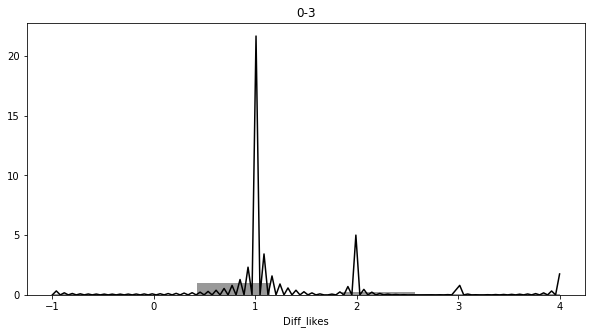

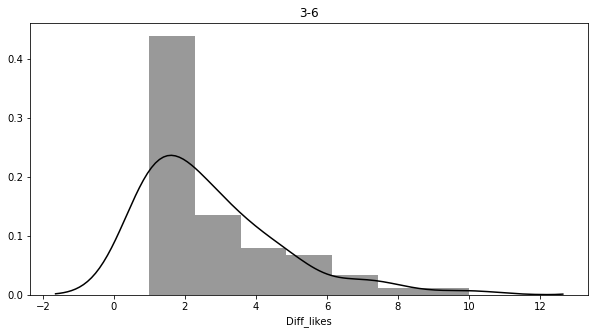

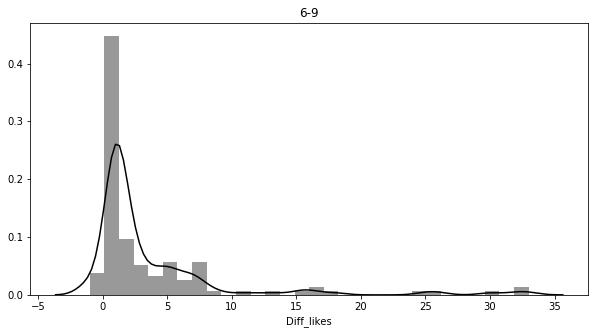

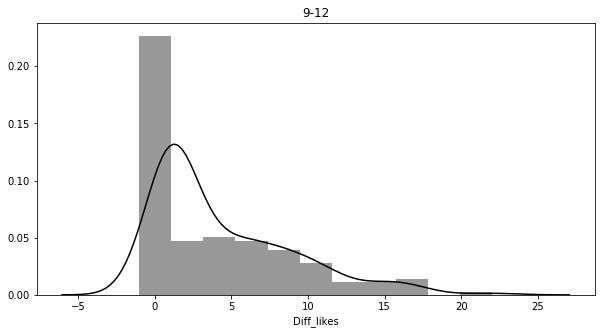

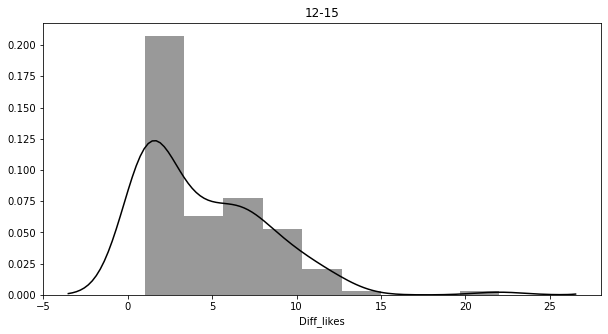

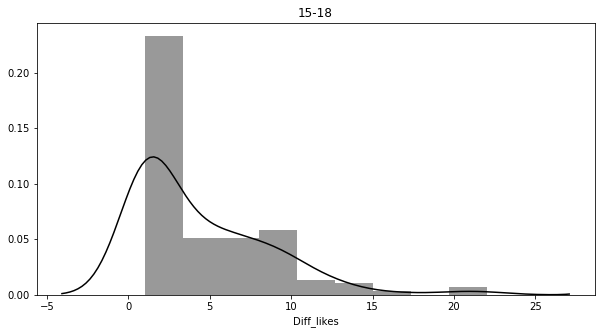

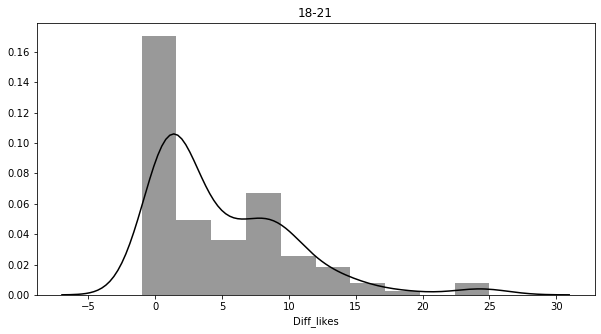

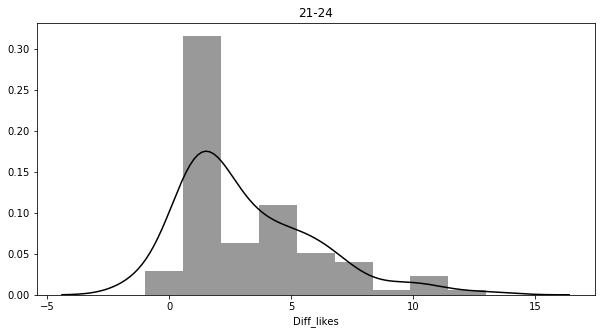

In [33]:
for time_int in time_int_hist:
    plt.figure(figsize=(10,5))
    sns.distplot(inst_no0_diff_likes.loc[inst_no0_diff_likes.Time_intervals == time_int]['Diff_likes'],
                 color="black").set_title(time_int);

#### Statistics

In [7]:
inst_diff_likes[['Diff_likes', 'Time_intervals']].groupby(['Time_intervals'], sort=False).describe()

Diff_likes                                              
                    count      mean       std  min  25%  50%  75%   max
Time_intervals                                                         
0-3                2664.0  0.022898  0.210147 -1.0  0.0  0.0  0.0   4.0
3-6                2656.0  0.070783  0.533154  0.0  0.0  0.0  0.0  10.0
6-9                2622.0  0.196796  1.607457 -1.0  0.0  0.0  0.0  33.0
9-12               2641.0  0.284741  1.573198 -1.0  0.0  0.0  0.0  22.0
12-15              2645.0  0.207561  1.234748  0.0  0.0  0.0  0.0  22.0
15-18              2662.0  0.208114  1.304273  0.0  0.0  0.0  0.0  22.0
18-21              2664.0  0.280781  1.667878 -1.0  0.0  0.0  0.0  25.0
21-24              2646.0  0.133787  0.849027 -1.0  0.0  0.0  0.0  13.0

In [8]:
inst_no0_diff_likes[['Diff_likes', 'Time_intervals']].groupby(['Time_intervals'], sort=False).describe()

Diff_likes                                              
                    count      mean       std  min  25%  50%  75%   max
Time_intervals                                                         
0-3                  49.0  1.244898  0.947158 -1.0  1.0  1.0  1.0   4.0
3-6                  69.0  2.724638  1.939406  1.0  1.0  2.0  4.0  10.0
6-9                 138.0  3.739130  6.007665 -1.0  1.0  1.0  4.0  33.0
9-12                171.0  4.397661  4.498993 -1.0  1.0  2.0  7.0  22.0
12-15               122.0  4.500000  3.720060  1.0  1.0  4.0  7.0  22.0
15-18               125.0  4.432000  4.199339  1.0  1.0  3.0  7.0  22.0
18-21               149.0  5.020134  5.108908 -1.0  1.0  3.0  8.0  25.0
21-24               112.0  3.160714  2.742898 -1.0  1.0  2.0  5.0  13.0

#### Tests

In [14]:
kruskal(*[group["Diff_likes"].values for _, group in inst_diff_likes[['Diff_likes', 'Time_intervals']].groupby(['Time_intervals'])])

KruskalResult(statistic=106.48304171235681, pvalue=4.920770234254803e-20)

In [16]:
time_int_photo_ph = sp.posthoc_dunn(inst_diff_likes[['Diff_likes', 'Time_intervals']], val_col='Diff_likes',
                group_col='Time_intervals',
                p_adjust='holm-sidak').replace(-1,1)
reindex_ph(time_int_photo_ph).style.background_gradient(cmap='coolwarm_r')

,0-3,3-6,6-9,9-12,12-15,15-18,18-21,21-24
0-3,1,0.577302,3.74021e-07,0,1.50348e-06,7.31068e-07,6.22992e-11,0.00109862
3-6,0.577302,1,0.00193291,3.7637e-10,0.00492128,0.00309972,3.7173e-06,0.254206
6-9,3.74021e-07,0.00193291,1,0.0552648,0.990366,0.990366,0.659166,0.659166
9-12,0,3.7637e-10,0.0552648,1,0.02786,0.0389903,0.659166,0.00014602
12-15,1.50348e-06,0.00492128,0.990366,0.02786,1,0.990366,0.659166,0.659166
15-18,7.31068e-07,0.00309972,0.990366,0.0389903,0.990366,1,0.659166,0.659166
18-21,6.22992e-11,3.7173e-06,0.659166,0.659166,0.659166,0.659166,1,0.0410047
21-24,0.00109862,0.254206,0.659166,0.00014602,0.659166,0.659166,0.0410047,1


In [10]:
kruskal(*[group["Diff_likes"].values for _, group in inst_no0_diff_likes[['Diff_likes', 'Time_intervals']].groupby(['Time_intervals'])])

KruskalResult(statistic=51.21349905228241, pvalue=8.340578323800783e-09)

In [9]:
time_int_photo_ph_no0 = sp.posthoc_dunn(inst_no0_diff_likes[['Diff_likes', 'Time_intervals']], val_col='Diff_likes',
                group_col='Time_intervals',
                p_adjust='holm-sidak').replace(-1,1)
reindex_ph(time_int_photo_ph_no0).style.background_gradient(cmap='coolwarm_r')

,0-3,3-6,6-9,9-12,12-15,15-18,18-21,21-24
0-3,1,0.00620765,0.0375043,1.59152e-05,7.53017e-08,2.5225e-06,6.8138e-07,0.000678497
3-6,0.00620765,1,0.936904,0.959229,0.379963,0.813247,0.772238,0.959721
6-9,0.0375043,0.936904,1,0.171306,0.0016949,0.0357164,0.0131347,0.777096
9-12,1.59152e-05,0.959229,0.171306,1,0.767092,0.959229,0.956166,0.959229
12-15,7.53017e-08,0.379963,0.0016949,0.767092,1,0.959229,0.959229,0.373781
15-18,2.5225e-06,0.813247,0.0357164,0.959229,0.959229,1,0.959721,0.830821
18-21,6.8138e-07,0.772238,0.0131347,0.956166,0.959229,0.959721,1,0.777096
21-24,0.000678497,0.959721,0.777096,0.959229,0.373781,0.830821,0.777096,1


### Each day as single observation

#### Plots

In [4]:
diff_group_pipe = Pipeline([('diff_maker', select_by_time(time_freq='3h')),
                            ('add_intervals', hours_interval(dividing_points=range(0, 25, 3),
                                                             low_int=True, int_time_col='Time', full_day=True)),
                            ('group_int', group_by_days())])
inst_int_group_likes = diff_group_pipe.transform(instagram)
inst_int_no0_group_likes = inst_int_group_likes.loc[inst_int_group_likes['Diff_likes'] != 0]

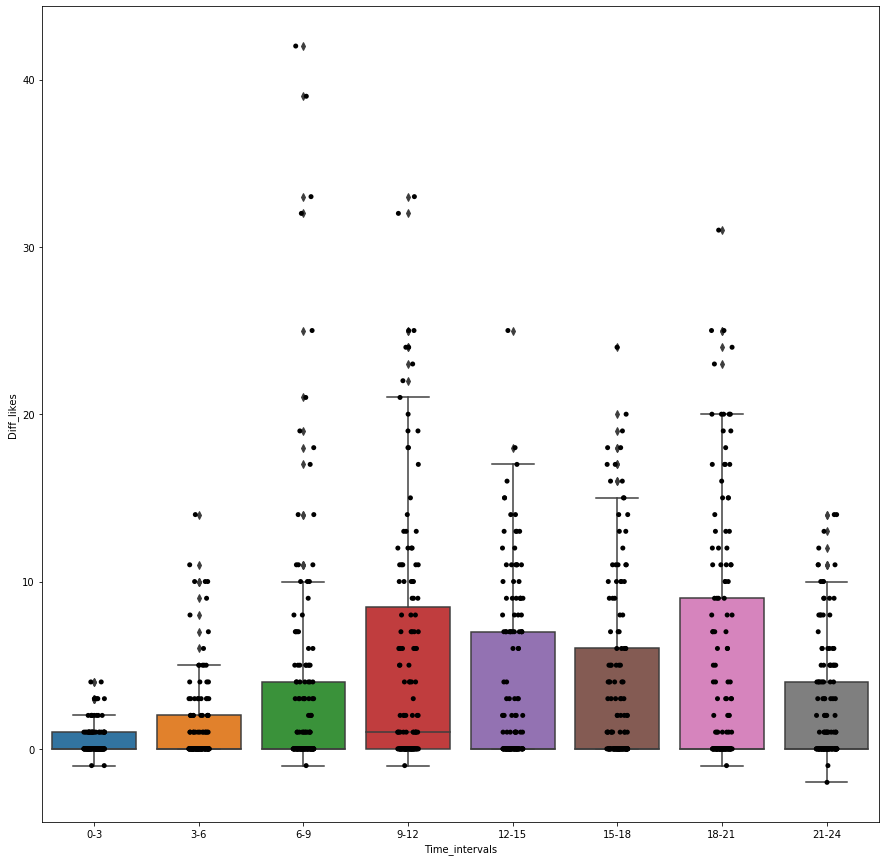

In [8]:
plt.figure(figsize=(15,15))
sns.boxplot(x="Time_intervals", y="Diff_likes", data=inst_int_group_likes);
sns.stripplot(x="Time_intervals", y="Diff_likes", data=inst_int_group_likes, jitter=True, color='black');

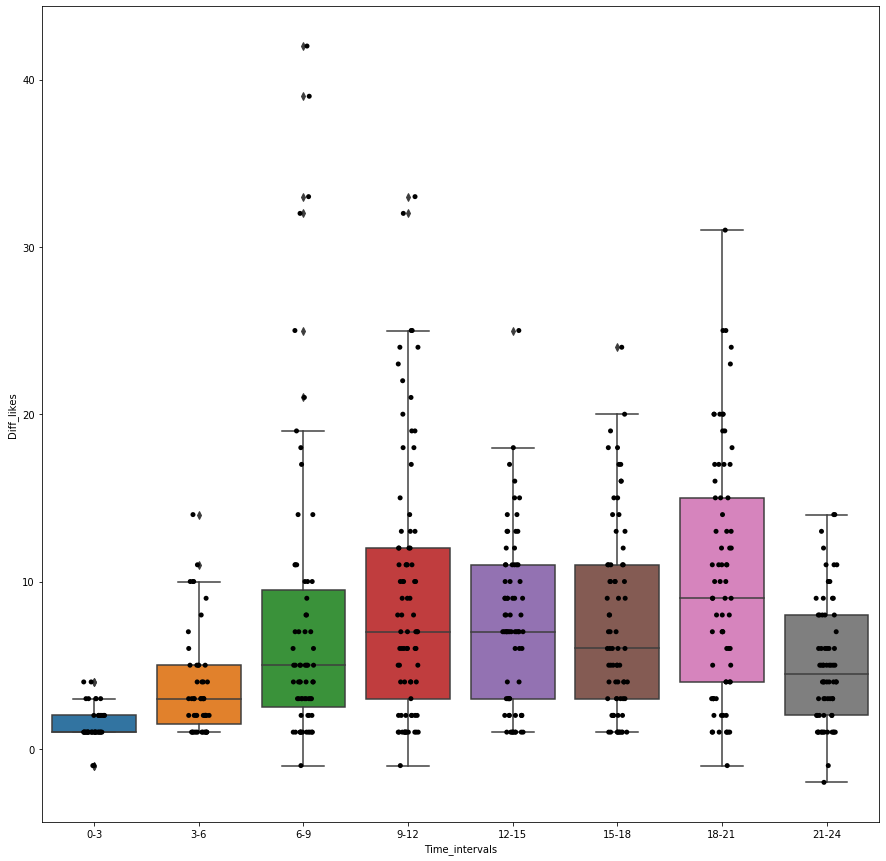

In [20]:
plt.figure(figsize=(15,15))
sns.boxplot(x="Time_intervals", y="Diff_likes", data=inst_int_no0_group_likes);
sns.stripplot(x="Time_intervals", y="Diff_likes", data=inst_int_no0_group_likes, jitter=True, color='black');

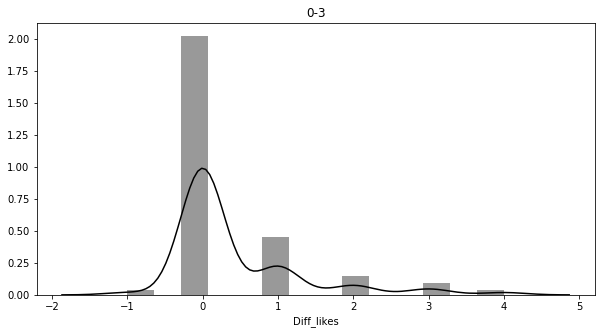

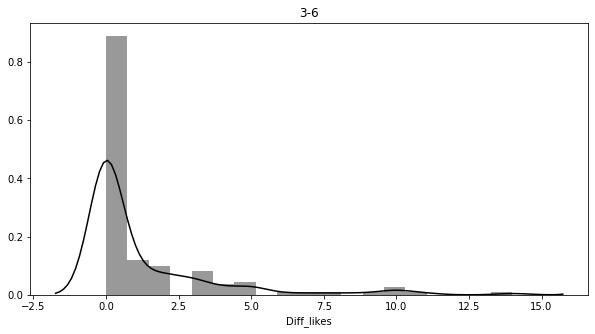

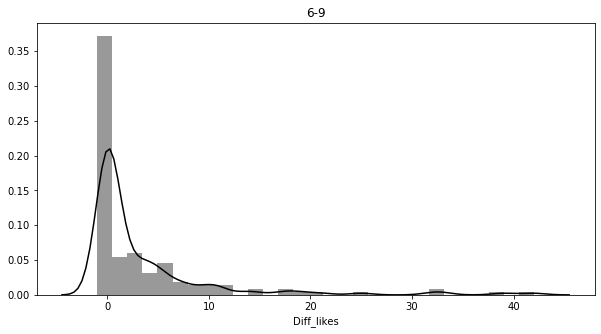

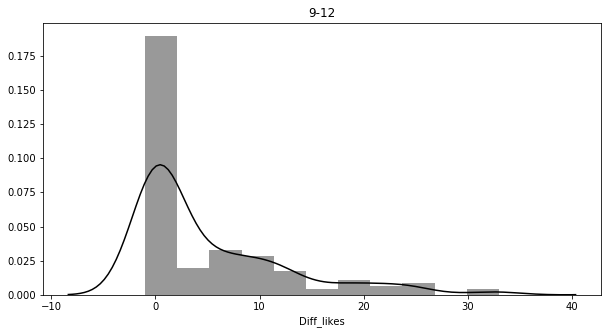

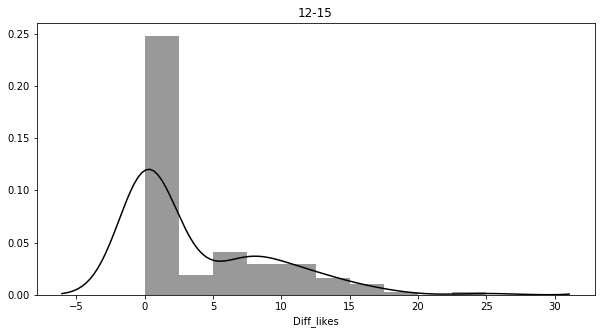

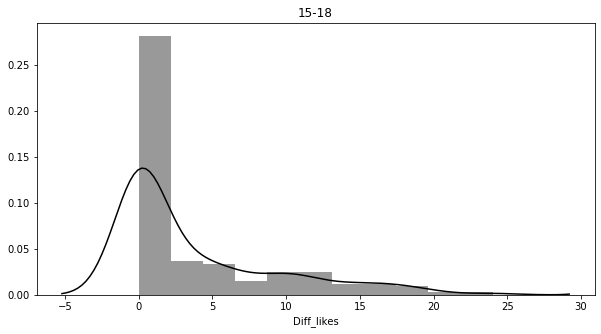

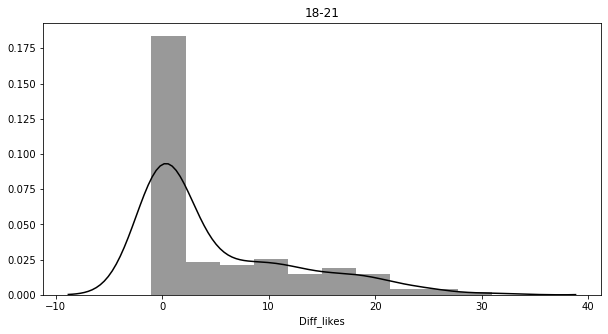

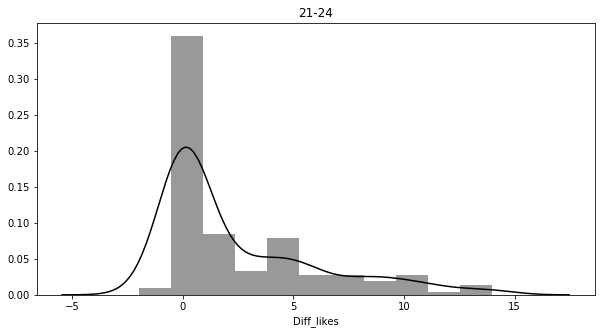

In [45]:
time_int_hist = inst_int_group_likes.Time_intervals.unique()
for time_int in time_int_hist:
    plt.figure(figsize=(10,5))
    sns.distplot(inst_int_group_likes.loc[inst_int_group_likes.Time_intervals == time_int]['Diff_likes'],
                 color="black").set_title(time_int);

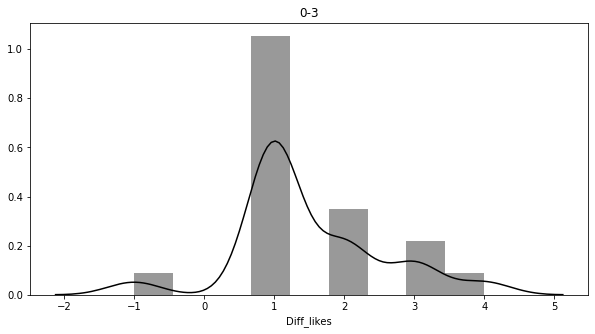

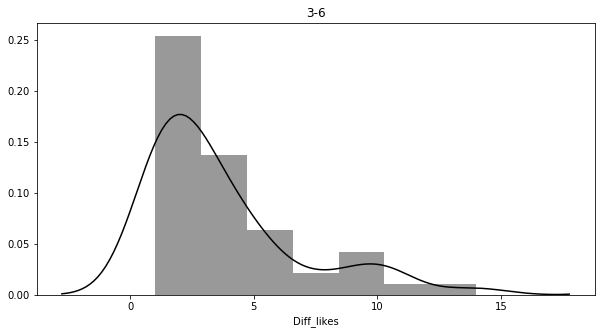

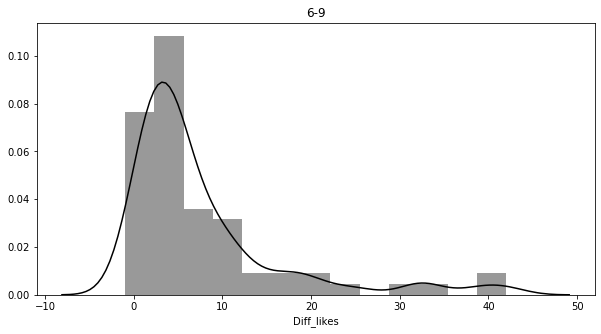

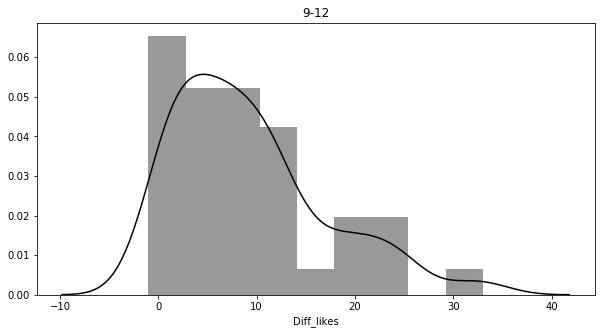

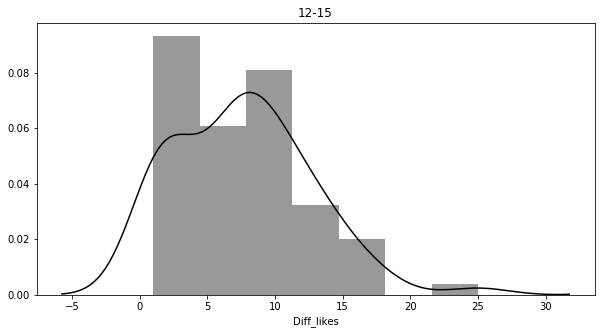

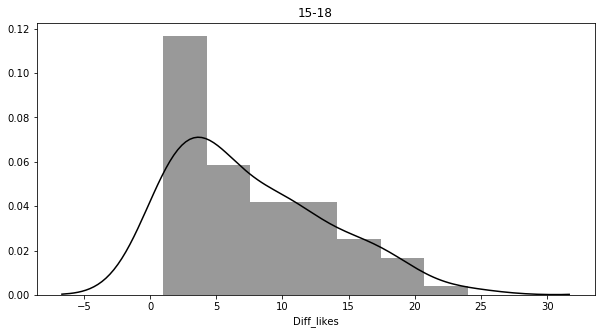

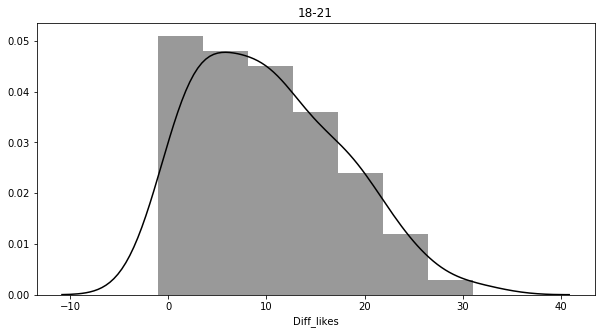

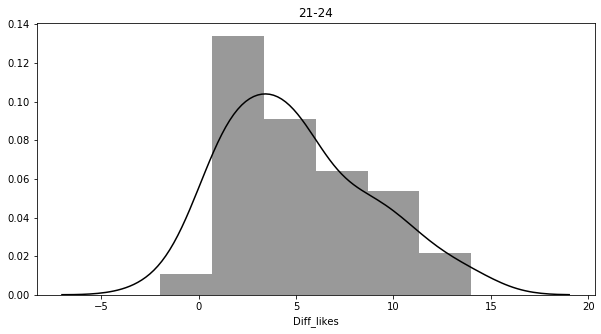

In [46]:
for time_int in time_int_hist:
    plt.figure(figsize=(10,5))
    sns.distplot(inst_int_no0_group_likes.loc[inst_int_no0_group_likes.Time_intervals == time_int]['Diff_likes'],
                 color="black").set_title(time_int);

#### Statistics

In [42]:
inst_int_group_likes.groupby('Time_intervals', sort=False).describe()

Diff_likes                                              
                    count      mean       std  min  25%  50%  75%   max
Time_intervals                                                         
0-3                 148.0  0.412162  0.864485 -1.0  0.0  0.0  1.0   4.0
3-6                 148.0  1.270270  2.522267  0.0  0.0  0.0  2.0  14.0
6-9                 147.0  3.510204  7.205751 -1.0  0.0  0.0  4.0  42.0
9-12                147.0  5.115646  7.368497 -1.0  0.0  1.0  8.5  33.0
12-15               147.0  3.734694  5.174128  0.0  0.0  0.0  7.0  25.0
15-18               148.0  3.743243  5.509573  0.0  0.0  0.0  6.0  24.0
18-21               148.0  5.054054  7.242903 -1.0  0.0  0.0  9.0  31.0
21-24               147.0  2.408163  3.589855 -2.0  0.0  0.0  4.0  14.0

In [43]:
inst_int_no0_group_likes.groupby('Time_intervals', sort=False).describe()

Diff_likes                                                
                    count       mean       std  min  25%  50%   75%   max
Time_intervals                                                           
0-3                  41.0   1.487805  1.051712 -1.0  1.0  1.0   2.0   4.0
3-6                  51.0   3.686275  3.101549  1.0  1.5  3.0   5.0  14.0
6-9                  67.0   7.701493  9.060428 -1.0  2.5  5.0   9.5  42.0
9-12                 81.0   9.283951  7.739888 -1.0  3.0  7.0  12.0  33.0
12-15                72.0   7.625000  4.997006  1.0  3.0  7.0  11.0  25.0
15-18                73.0   7.589041  5.690723  1.0  3.0  6.0  11.0  24.0
18-21                73.0  10.246575  7.291130 -1.0  4.0  9.0  15.0  31.0
21-24                70.0   5.057143  3.698357 -2.0  2.0  4.5   8.0  14.0

#### Tests

In [11]:
kruskal(*[group["Diff_likes"].values for _, group in inst_int_group_likes[['Diff_likes', 'Time_intervals']].groupby(['Time_intervals'])])

KruskalResult(statistic=69.24716319536682, pvalue=2.0969323127548736e-12)

In [13]:
time_int_day_ph = sp.posthoc_dunn(inst_int_group_likes[['Diff_likes', 'Time_intervals']], val_col='Diff_likes',
                group_col='Time_intervals',
                p_adjust='holm-sidak').replace(-1,1)
reindex_ph(time_int_day_ph).style.background_gradient(cmap='coolwarm_r')

,0-3,3-6,6-9,9-12,12-15,15-18,18-21,21-24
0-3,1,0.570122,0.00048093,1.61371e-09,1.15375e-06,1.57393e-06,7.86608e-08,0.000812646
3-6,0.570122,1,0.265222,7.54495e-05,0.00674753,0.00821616,0.00109992,0.318857
6-9,0.00048093,0.265222,1,0.299073,0.898153,0.900594,0.696689,0.989477
9-12,1.61371e-09,7.54495e-05,0.299073,1,0.900594,0.900594,0.977791,0.245451
12-15,1.15375e-06,0.00674753,0.898153,0.900594,1,0.989477,0.977791,0.885462
15-18,1.57393e-06,0.00821616,0.900594,0.900594,0.989477,1,0.977791,0.895563
18-21,7.86608e-08,0.00109992,0.696689,0.977791,0.977791,0.977791,1,0.620218
21-24,0.000812646,0.318857,0.989477,0.245451,0.885462,0.895563,0.620218,1


In [9]:
kruskal(*[group["Diff_likes"].values for _, group in inst_int_no0_group_likes[['Diff_likes', 'Time_intervals']].groupby(['Time_intervals'])])

KruskalResult(statistic=99.94627508579207, pvalue=1.1067120669877174e-18)

In [5]:
time_int_day_ph_no0 = sp.posthoc_dunn(inst_int_no0_group_likes[['Diff_likes', 'Time_intervals']], val_col='Diff_likes',
                group_col='Time_intervals',
                p_adjust='holm-sidak').replace(-1,1)
reindex_ph(time_int_day_ph_no0).style.background_gradient(cmap='coolwarm_r')

,0-3,3-6,6-9,9-12,12-15,15-18,18-21,21-24
0-3,1,0.0566683,7.42952e-07,2.17626e-12,7.64309e-11,6.17234e-10,3.10862e-15,4.8102e-05
3-6,0.0566683,1,0.107753,8.04108e-05,0.000656604,0.00240452,7.42952e-07,0.513763
6-9,7.42952e-07,0.107753,1,0.384421,0.621207,0.784077,0.0362348,0.798773
9-12,2.17626e-12,8.04108e-05,0.384421,1,0.900282,0.809442,0.784077,0.0362348
12-15,7.64309e-11,0.000656604,0.621207,0.900282,1,0.900282,0.631912,0.118319
15-18,6.17234e-10,0.00240452,0.784077,0.809442,0.900282,1,0.455793,0.274368
18-21,3.10862e-15,7.42952e-07,0.0362348,0.784077,0.631912,0.455793,1,0.000823679
21-24,4.8102e-05,0.513763,0.798773,0.0362348,0.118319,0.274368,0.000823679,1
